## Importing Relevant Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.cluster import KMeans

## Mounting Google Drive to access data

In [ ]:
# Mount Google Drive to access necessary data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Steps taken before:
1. Went through and manually changed file names to the dates of sales in a standardized format.

## Data Cleaning

Declaring paths

In [ ]:
path_items = '/content/drive/MyDrive/Lake Monsters Data Updated/concessions_data/items_data'
path_sales = '/content/drive/MyDrive/Lake Monsters Data Updated/concessions_data/sales_data'
path_combined = '/content/drive/MyDrive/Lake Monsters Data Updated/concessions_data/combined_data'

Adding a date column and populating it based on the title

In [ ]:
# Get a list of all files in the directory
files = os.listdir(path_items)

# Go through each file
for file in files:
    if file.endswith('.csv'):  # Checks if it's a CSV file
        # Read the CSV file
        data = pd.read_csv(os.path.join(path_items, file))

        # Drop rows where Revenue Center is empty if the column exists
        if 'Revenue Center' in data.columns:
            data = data.dropna(subset=['Revenue Center'])

        # Drop rows where Net Sales is 0 if the column exists
        if 'Net Sales' in data.columns:
            data = data[data['Net Sales'] != 0]

        # Create a date column using the date in the title of the file
        date = file.split('_')[0]  # Extracts the date from the file name
        data['date'] = date

        # Save the cleaned and modified DataFrame to a new CSV file
        data.to_csv(os.path.join(path_items, f'{date}_cleaned.csv'), index=False)

# Combine all CSV files into a single DataFrame and organize by date
all_files = [file for file in os.listdir(path_items) if file.endswith('_cleaned.csv')]
all_data = []
for file in all_files:
    data = pd.read_csv(os.path.join(path_items, file))
    all_data.append(data)

combined_data = pd.concat(all_data).sort_values(by='date')

# Save the combined DataFrame to a single CSV file
combined_data.to_csv(os.path.join(path_items, 'combined_items_data.csv'), index=False)


In [ ]:
def add_date_column_to_csv(directory):
    for filename in os.listdir(directory):
        if filename.endswith(".csv"):
            file_path = os.path.join(directory, filename)
            date = filename.split('.')[0]  # Extracts date from file name
            data = pd.read_csv(file_path)

            # Checks if Date and Area columns exist before dropping
            if 'Date' in data.columns and 'Area' in data.columns:
                data.drop(columns=['Date', 'Area'], inplace=True)

            data['date'] = date  # Adds date column
            data.to_csv(file_path, index=False)  # Saves back to CSV

# Process both directories
add_date_column_to_csv(path_items)
add_date_column_to_csv(path_sales)


Joins everything into one CSV

In [ ]:
def join_and_sort_by_date(directory):
    all_data = []

    # Go through each file in the directory
    for filename in os.listdir(directory):
        if filename.endswith(".csv"):
            file_path = os.path.join(directory, filename)
            data = pd.read_csv(file_path)
            all_data.append(data)

    # Concatenate all DataFrames together
    combined_data = pd.concat(all_data)

    # Convert date column to datetime type
    combined_data['date'] = pd.to_datetime(combined_data['date'])

    # Sort the combined DataFrame by the date column in ascending order
    combined_data.sort_values(by='date', inplace=True)

    return combined_data

# Define paths
path_combined = '/content/drive/MyDrive/Lake Monsters Data/concessions_data/combined_data'
path_items = '/content/drive/MyDrive/Lake Monsters Data/concessions_data/items_by_rev_center'
path_sales = '/content/drive/MyDrive/Lake Monsters Data/concessions_data/sales_by_rev_center'

# Create directory if it doesn't exist
os.makedirs(path_combined, exist_ok=True)

# Join and sort all CSV files in the path_items directory
combined_items_data = join_and_sort_by_date(path_items)
combined_items_data.to_csv(os.path.join(path_combined, 'combined_items_data.csv'), index=False)

# Join and sort all CSV files in the path_sales directory
combined_sales_data = join_and_sort_by_date(path_sales)
combined_sales_data.to_csv(os.path.join(path_combined, 'combined_sales_data.csv'), index=False)


<ipython-input-20-16e2974bd7ca>:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['date'] = pd.to_datetime(combined_df['date'])
<ipython-input-20-16e2974bd7ca>:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['date'] = pd.to_datetime(combined_df['date'])


Removing Revenue Center Totals

In [ ]:
path_combined_items = '/content/drive/MyDrive/MGT-150 Cleaned Data/Data/Concessions/combined_items_data.csv'
path_combined_sales = '/content/drive/MyDrive/MGT-150 Cleaned Data/Data/Concessions/combined_sales_data.csv'
path_new_combined = '/content/drive/MyDrive/MGT-150 Cleaned Data/Data/Concessions/new_combined'
path_new_items = '/content/drive/MyDrive/MGT-150 Cleaned Data/Data/Concessions/new_combined/new_items.csv'
path_new_sales = '/content/drive/MyDrive/MGT-150 Cleaned Data/Data/Concessions/new_combined/new_sales.csv'

Items data

In [ ]:
# Read the CSV file into a DataFrame
data = pd.read_csv(path_combined_items)

# Drop rows with "Revenue Center #X Total" in the Revenue Center column
data = data[~data['Revenue Center'].str.contains('Revenue Center #\d+ Total')]

# Drop the Item Name column
data.drop(columns=['Item Name'], inplace=True)

# Reset index if needed
data.reset_index(drop=True, inplace=True)

# Export the modified DataFrame to a new CSV file
data.to_csv(path_new_items, index=False)

print("File exported successfully to:", path_new_items)

File exported successfully to: /content/drive/MyDrive/MGT-150 Cleaned Data/Data/Concessions/new_combined/new_items.csv


Sales Data

In [ ]:
# Read the CSV file into a DataFrame
data = pd.read_csv(path_combined_sales)

# Drop rows with "Revenue Center #X Total" in the Revenue Center column
data = data[~data['Sales Category'].str.contains('Revenue Center #\d+ Total')]

# Drop the Item Name column
data.drop(columns=['Revenue Center'], inplace=True)

# Reset index if needed
data.reset_index(drop=True, inplace=True)

# Export the modified DataFrame to a new CSV file
data.to_csv(path_new_sales, index=False)

print("File exported successfully to:", path_new_sales)

File exported successfully to: /content/drive/MyDrive/MGT-150 Cleaned Data/Data/Concessions/new_combined/new_sales.csv


# Analysis

Creating variables for logo colors

In [ ]:
# Official logo colors according to : https://en.wikipedia.org/wiki/Vermont_Lake_Monsters
navy_blue = '#000080'
lime_green = '#00FF00'
columbia_blue = '#9BC4E2'

Assigning paths to variables

In [ ]:
combined_sales = '/content/drive/MyDrive/MGT-150 Cleaned Data/Data/Concessions/new_combined/new_sales.csv'
combined_items = '/content/drive/MyDrive/MGT-150 Cleaned Data/Data/Concessions/new_combined/new_items.csv'

Checking data

In [ ]:
sales = pd.read_csv(combined_sales)
sales

,Sales Category,Item Qty,Net Sales,Discount Amount,Gross Sales,Tax Amount,date
0,Cabana Bar RC,24,184.00,0.00,184.00,0.00,2023-05-24
1,Hot Corner RC,253,1259.06,25.21,1284.27,137.93,2023-05-24
2,Main Stand RC,685,2896.70,17.66,2914.36,317.16,2023-05-24
3,Blue Trailer RC,182,1272.71,3.14,1275.85,140.29,2023-05-24
4,Main Beer Stand RC,12,42.50,0.00,42.50,0.00,2023-05-24
...,...,...,...,...,...,...,...
1073,Dippin Dots RC,86,535.68,6.28,541.96,59.32,2023-08-09
1074,Merchandise RC,102,1433.15,24.90,1458.05,52.57,2023-08-09
1075,Pavillion Bar RC,23,69.08,0.00,69.08,7.42,2023-08-09
1076,Main Stand RC,216,509.19,6.08,515.27,55.06,2023-08-09


In [ ]:
items = pd.read_csv(combined_items)
items

,Revenue Center,Item Qty,Net Sales,Discount Amount,Gross Sales,Tax Amount,date
0,Long Trail Blackberry DFT,8,64.00,0.00,64.00,0.00,2023-05-24
1,Cracker Jacks,2,10.00,0.00,10.00,0.00,2023-05-24
2,14th Star Mexican Lager DFT,15,120.00,0.00,120.00,0.00,2023-05-24
3,Good Measure Cream Ale DFT,21,126.00,0.00,126.00,0.00,2023-05-24
4,Peanuts,5,20.00,0.00,20.00,0.00,2023-05-24
...,...,...,...,...,...,...,...
7916,Bottled Water,13,29.38,0.00,29.38,3.12,2023-08-09
7917,ZG Lake Monster Light DFT,15,80.40,0.00,80.40,9.60,2023-08-09
7918,Bud Light DFT,8,42.88,0.00,42.88,5.12,2023-08-09
7919,802 Bar,3,9.02,1.81,10.83,0.98,2023-08-09


##Data Understanding

**Summary Statistics**

In [ ]:
# Summary statistics for numerical variables
summary_stats = sales.describe()
print(summary_stats)

          Item Qty     Net Sales  Discount Amount   Gross Sales   Tax Amount
count  1078.000000   1078.000000      1078.000000   1078.000000  1078.000000
mean    136.703154    768.012449         6.774026    774.786475    69.562087
std     290.636050   1325.890111        15.557813   1334.480480   105.314122
min       1.000000      0.000000         0.000000      0.000000     0.000000
25%      13.000000     63.825000         0.000000     64.350000     5.950000
50%      46.000000    239.645000         0.000000    242.490000    25.225000
75%     151.750000    905.820000         4.290000    912.205000    95.567500
max    4663.000000  10430.950000       145.820000  10486.950000   711.740000


After checking the summary stats, we can conclude that there is significant variability within the item sales quantity, net sales, gross sales, and tax amounts. This is expected but it does get me thinking about which items sell more than others. Another interesting insight is that discounts are not common, so I'll more than likely not focus on discounts during my analysis. Lastly, we can see that the data is heavily skewed. This suggests that some items sell way more often than others do.

In [ ]:
# Summary statistics for numerical variables
summary_stats = items.describe()
print(summary_stats)

          Item Qty    Net Sales  Discount Amount  Gross Sales   Tax Amount
count  7921.000000  7921.000000      7921.000000  7921.000000  7921.000000
mean     15.424189    84.725180         0.783669    85.508849     7.577387
std      86.316642   157.876143         3.090786   158.859301    17.777236
min       0.000000   -49.990000         0.000000     0.000000     0.000000
25%       1.000000    18.040000         0.000000    18.050000     0.000000
50%       3.000000    32.400000         0.000000    32.480000     1.580000
75%      12.000000    80.910000         0.000000    81.000000     6.650000
max    4295.000000  3039.930000        53.420000  3049.350000   337.570000


Despite this being a different dataset we can see many of the same insights gained from the previous analysis. This makes sense as these two datasets should contain similar data just organized differently.

**Correlation Analysis**

In [ ]:
sales_num = sales.drop(['Sales Category', 'date', 'Tax Amount'], axis = 1)

# Calculating correlation matrix
sales_correlation_matrix = sales_num.corr()

# Printing correlation matrix
print(sales_correlation_matrix)

                 Item Qty  Net Sales  Discount Amount  Gross Sales
Item Qty         1.000000   0.534773          0.25833     0.534342
Net Sales        0.534773   1.000000          0.54808     0.999952
Discount Amount  0.258330   0.548080          1.00000     0.556210
Gross Sales      0.534342   0.999952          0.55621     1.000000


Not much to take away besides the extremely high correlation between net sales and gross sales. This relationship is obvious since net sales is just gross sales - discount applied. All it really tells us is that discounts are infrequent.

In [ ]:
items_num = items.drop(['Revenue Center', 'date', 'Tax Amount'], axis = 1)

# Calculating correlation matrix
items_correlation_matrix = items_num.corr()

# Printing correlation matrix
print(items_correlation_matrix)

                 Item Qty  Net Sales  Discount Amount  Gross Sales
Item Qty         1.000000   0.403156         0.109149     0.402784
Net Sales        0.403156   1.000000         0.309295     0.999829
Discount Amount  0.109149   0.309295         1.000000     0.326837
Gross Sales      0.402784   0.999829         0.326837     1.000000


Once again, this dataset displays many of the same characteristics and relationships.

**Cluster Analysis**

In [ ]:
# Creates a KMeans model with desired number of clusters
kmeans = KMeans(n_clusters=3)

# Fitting the model to your data
kmeans.fit(sales_num)

# Getting cluster labels
cluster_labels = kmeans.labels_

# Printing cluster labels
print(cluster_labels)

# Adding cluster labels to the original DataFrame
sales_num['Cluster'] = cluster_labels

# Getting summary statistics for each cluster
cluster_summary = sales_num.groupby('Cluster').describe()

# Printing cluster summary
cluster_summary

[0 2 2 ... 0 0 0]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Item Qty                                                              \
           count        mean         std    min    25%    50%    75%     max   
Cluster                                                                        
0          854.0   56.031616   95.021033    1.0   10.0   28.0   75.0  1587.0   
1           41.0  610.609756  297.681699  252.0  354.0  569.0  809.0  1304.0   
2          183.0  406.994536  532.420355   69.0  219.0  293.0  467.5  4663.0   

        Net Sales               ... Discount Amount         Gross Sales  \
            count         mean  ...             75%     max       count   
Cluster                         ...                                       
0           854.0   257.137529  ...           1.360   71.78       854.0   
1            41.0  5962.583415  ...          56.220  145.82        41.0   
2           183.0  1988.284426  ...          24.545  114.31       183.0   

                                                                           \
                mean          std      min        25%      50%        75%   
Cluster                                                                     
0         260.491112   287.461464     0.00    49.3225   142.97   385.6525   
1        5999.776585  1773.663476  4120.50  4811.0400  5354.71  6496.7500   
2        2004.205301   740.645867  1123.76  1410.2150  1764.83  2447.5200   

                   
              max  
Cluster            
0         1153.40  
1        10486.95  
2         3971.70  

[3 rows x 32 columns]

Cluster 0 has many different items but low sales. Thus, this cluster probably represents many low-demand items. The Lake Monsters should consider promoting these items more with different sales and bundles or consider discontinuing the sale of these underperforming items.

Cluster 1 does not have many observationsbut it does have the highest average quantity sold. Items in this cluster are high-demand items. The Lake Monsters should consider keeping a high inventory for these items because of how much they sell and consider the pricing to maximize revenue.

Cluster 2 has a moderate amount of observations and average sales. It is safe to assume that these items generate steady revenue. The Lake Monsters should consider potentially slightly tweaking prices to optimize revenue and keep an eye out for opportunities to increase sales through different promotions.

---



In [ ]:
# Creates a KMeans model with desired number of clusters
kmeans = KMeans(n_clusters=3)

# Fitting the model to your data
kmeans.fit(items_num)

# Getting cluster labels
cluster_labels = kmeans.labels_

# Printing cluster labels
print(cluster_labels)

# Adding cluster labels to the original DataFrame
items_num['Cluster'] = cluster_labels

# Getting summary statistics for each cluster
cluster_summary = items_num.groupby('Cluster').describe()

# Printing cluster summary
cluster_summary


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0 0 0 ... 0 0 0]


Item Qty                                                              \
           count        mean         std   min    25%    50%     75%     max   
Cluster                                                                        
0         7165.0    6.730216    9.762389   0.0    1.0    3.0    8.00   204.0   
1           98.0  299.744898  661.591899  62.0  117.0  163.5  257.75  4295.0   
2          658.0   67.747720   92.350221   3.0   32.0   51.0   83.00  1566.0   

        Net Sales               ... Discount Amount        Gross Sales  \
            count         mean  ...             75%    max       count   
Cluster                         ...                                      
0          7165.0    45.779012  ...            0.00  49.99      7165.0   
1            98.0  1084.173061  ...            9.42  53.42        98.0   
2           658.0   359.958313  ...            3.60  52.48       658.0   

                                                                                
                mean         std     min       25%      50%       75%      max  
Cluster                                                                         
0          46.279290   43.415178    0.00   16.0000   28.990    62.510   209.09  
1        1089.429490  379.837063  739.68  839.8875  972.310  1182.860  3049.35  
2         363.161687  134.304291  178.25  252.3900  324.215   443.155   733.58  

[3 rows x 32 columns]

This cluster analysis shares many of the same attributes as the first one. Cluster 0 has lits of diversity but not much average sales. Cluster 1 has a small amount of items but generates lots of sales. Cluster 2 has average numbers all around.

# Visualizing Data

Grouping net sales per date

In [ ]:
# Grouping the DataFrame by date and sum the 'Net Sales' column for each date
net_sales_per_day = sales.groupby('date')['Net Sales'].sum()

# Printing the net sales for each day
print(net_sales_per_day)

date
2023-05-24    19980.52
2023-05-25    10049.30
2023-05-26    27494.81
2023-05-27    31199.34
2023-05-28    27594.32
2023-06-03    41462.69
2023-06-04    30777.28
2023-06-06    21286.93
2023-06-07     1676.21
2023-06-08     8869.45
2023-06-13    12040.55
2023-06-15    27451.88
2023-06-18    41530.57
2023-06-23    29862.04
2023-06-25    27981.31
2023-06-27    29798.65
2023-06-29    23435.18
2023-07-05    23439.00
2023-07-06    20287.12
2023-07-08    27661.93
2023-07-09    11797.28
2023-07-14    21424.62
2023-07-15    50396.55
2023-07-16    12152.13
2023-07-18    36236.15
2023-07-19    35774.77
2023-07-28      309.24
2023-07-30    50097.75
2023-08-01    45597.04
2023-08-03    22892.53
2023-08-04    38221.95
2023-08-08     8278.58
2023-08-09    10859.75
Name: Net Sales, dtype: float64


Visualizing everything

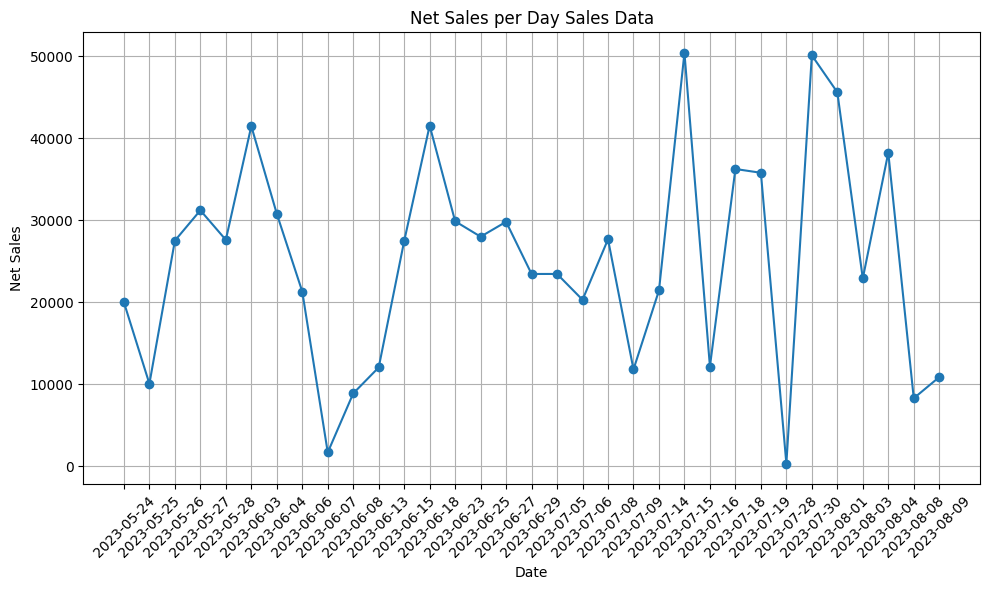

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(net_sales_per_day.index, net_sales_per_day.values, marker='o', linestyle='-')
plt.title('Net Sales per Day Sales Data')
plt.xlabel('Date')
plt.ylabel('Net Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Checking items data

Grouping net sales per date

In [ ]:
# Grouping the DataFrame by date and sum the 'Net Sales' column for each date
net_sales_item = items.groupby('date')['Net Sales'].sum()

# Printing the net sales for each day
print(net_sales_item)

date
2023-05-24    19980.52
2023-05-25    10049.30
2023-05-26    27494.81
2023-05-27    31199.34
2023-05-28    27594.32
2023-06-03    41462.69
2023-06-04    30777.28
2023-06-06    21286.93
2023-06-07     1676.21
2023-06-08     8869.45
2023-06-13    12040.55
2023-06-15    27451.88
2023-06-18    41530.57
2023-06-23    29862.04
2023-06-25    27981.31
2023-06-27    29798.65
2023-06-29    23435.18
2023-07-05    23439.00
2023-07-06    20287.12
2023-07-08    27661.93
2023-07-09    11797.28
2023-07-14    21424.62
2023-07-15    50396.55
2023-07-16    12152.13
2023-07-18    36236.15
2023-07-19    35774.77
2023-07-28      309.24
2023-08-08     8278.58
2023-08-09    10859.75
Name: Net Sales, dtype: float64


Visualize it

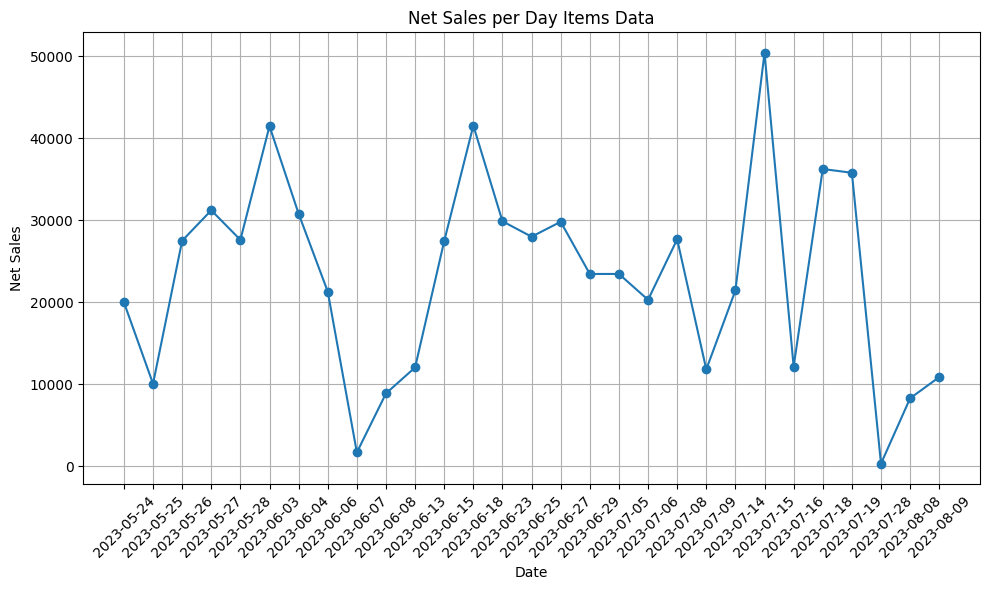

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(net_sales_item.index, net_sales_item.values, marker='o', linestyle='-')
plt.title('Net Sales per Day Items Data')
plt.xlabel('Date')
plt.ylabel('Net Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Comparing visualizations to see why there are discrepancies

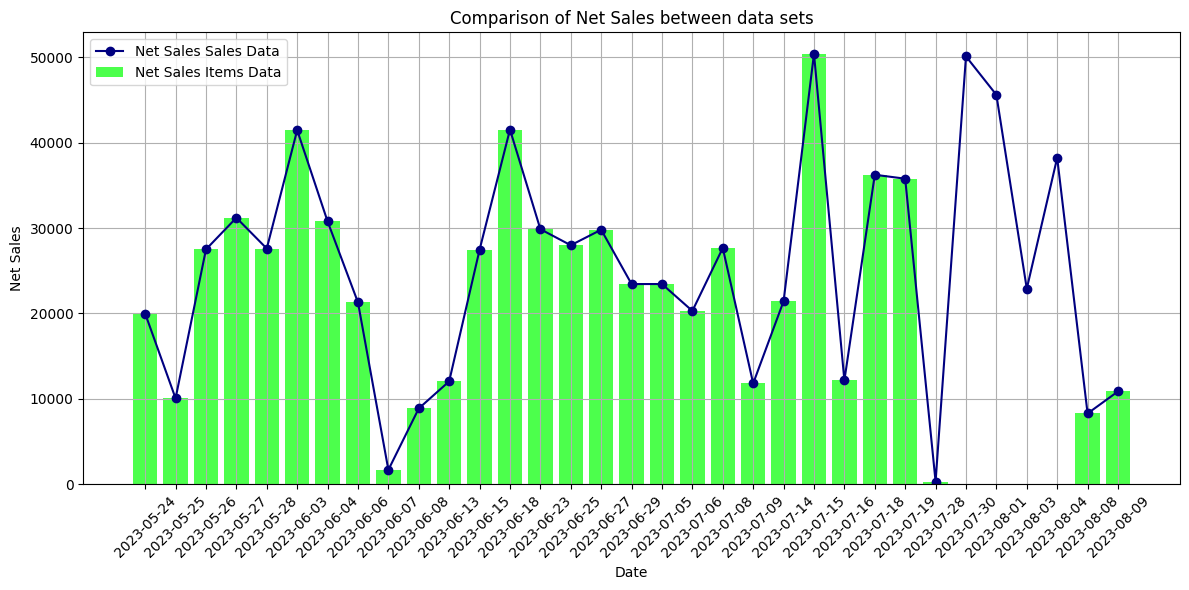

In [ ]:
# Setting Colors with VLM pattern
VLM = ['#000080', '#00FF00']

# Plotting the net sales per day
plt.figure(figsize=(12, 6))
plt.plot(net_sales_per_day.index, net_sales_per_day.values, marker='o', linestyle='-', label='Net Sales Sales Data', color=VLM[0])

# Plotting the net sales per item
plt.bar(net_sales_item.index, net_sales_item.values, color=VLM[1], alpha=0.7, label='Net Sales Items Data')

plt.title('Comparison of Net Sales between data sets')
plt.xlabel('Date')
plt.ylabel('Net Sales')
plt.xticks(rotation=45)
#plt.ylim(0, 800)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


As we can see there's a difference between the two datasets. I'll have to keep that in mind when conducting the analysis later on.

Visualizing which Revenue Centers sell the most items

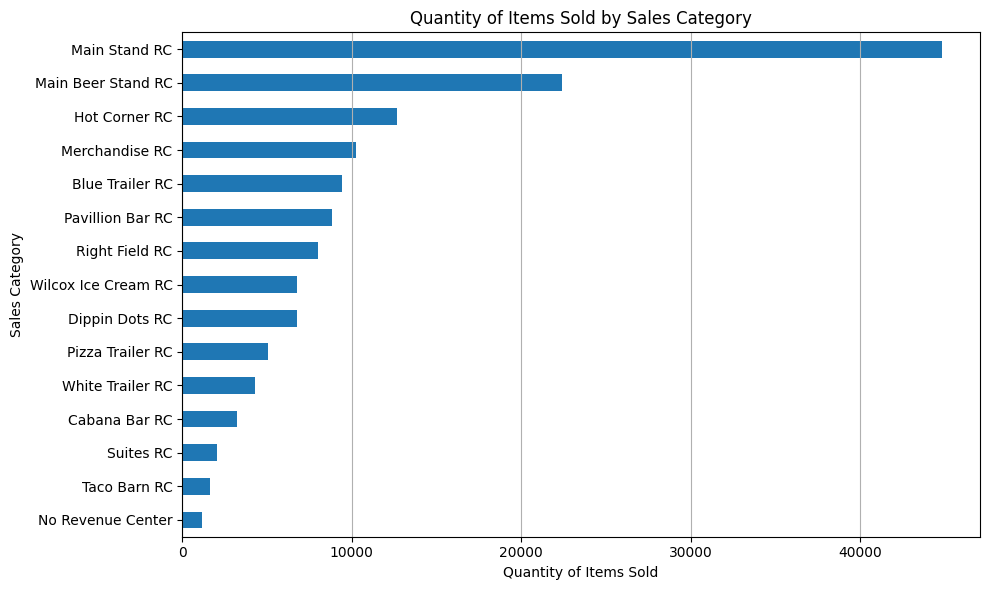

In [ ]:
# Groups the DataFrame by sales category and sum the 'Net Sales' column for each category
net_sales_by_category = sales.groupby('Sales Category')['Item Qty'].sum().sort_values()

# Plots the net sales by sales category
plt.figure(figsize=(10, 6))
net_sales_by_category.plot(kind='barh')
plt.title('Quantity of Items Sold by Sales Category')
plt.xlabel('Quantity of Items Sold')
plt.ylabel('Sales Category')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

Visualizing net sales by category



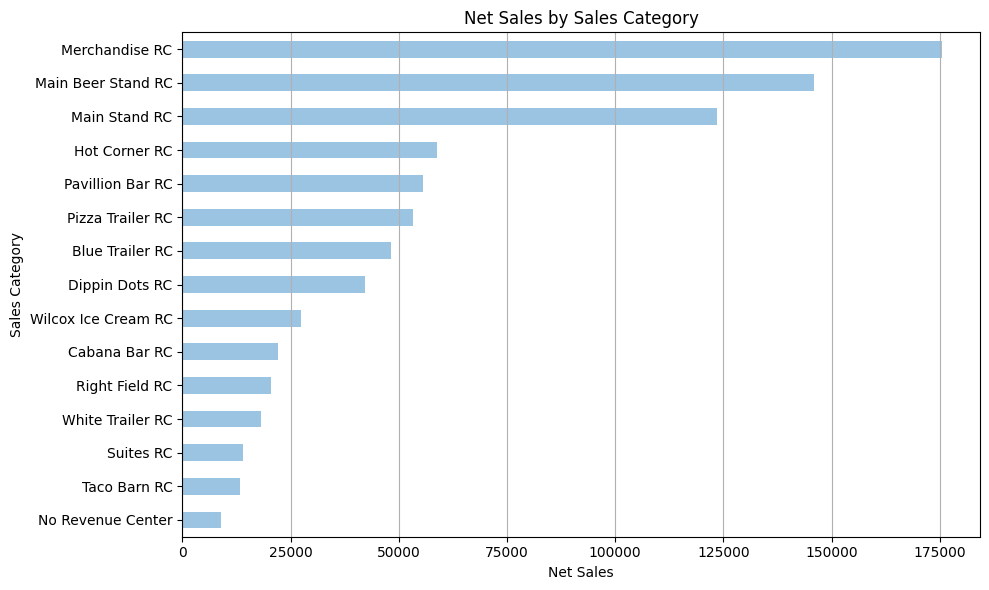

In [ ]:
# Groups the DataFrame by sales category and sum the 'Net Sales' column for each category
net_sales_by_category = sales.groupby('Sales Category')['Net Sales'].sum().sort_values()

# Plots the net sales by sales category
plt.figure(figsize=(10, 6))
net_sales_by_category.plot(kind='barh', color=columbia_blue)
plt.title('Net Sales by Sales Category')
plt.xlabel('Net Sales')
plt.ylabel('Sales Category')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

Visualizing the same thing but just the top 5 in the category

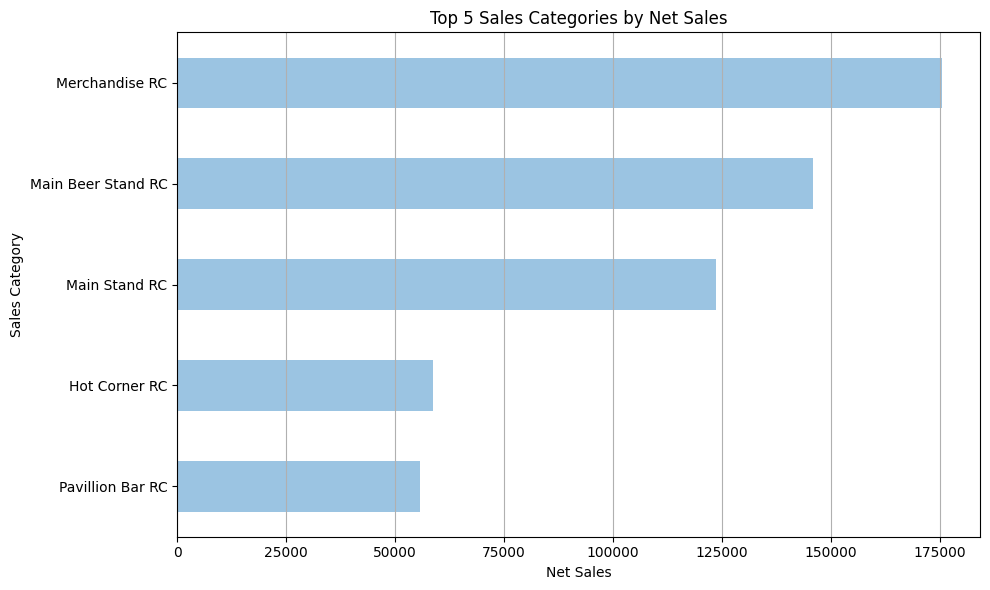

In [ ]:
# Groups the DataFrame by sales category and sum the Net Sales column for each category
net_sales_by_category = sales.groupby('Sales Category')['Net Sales'].sum()

# Gets the top 5 sales categories by net sales and sort them in descending order
top_5_categories = net_sales_by_category.nlargest(5).sort_values(ascending=True)

# Plots the net sales for the top 5 sales categories
plt.figure(figsize=(10, 6))
top_5_categories.plot(kind='barh', color=columbia_blue)
plt.title('Top 5 Sales Categories by Net Sales')
plt.xlabel('Net Sales')
plt.ylabel('Sales Category')
plt.grid(axis='x')
plt.tight_layout()
plt.show()


Checking the same data but in a different format

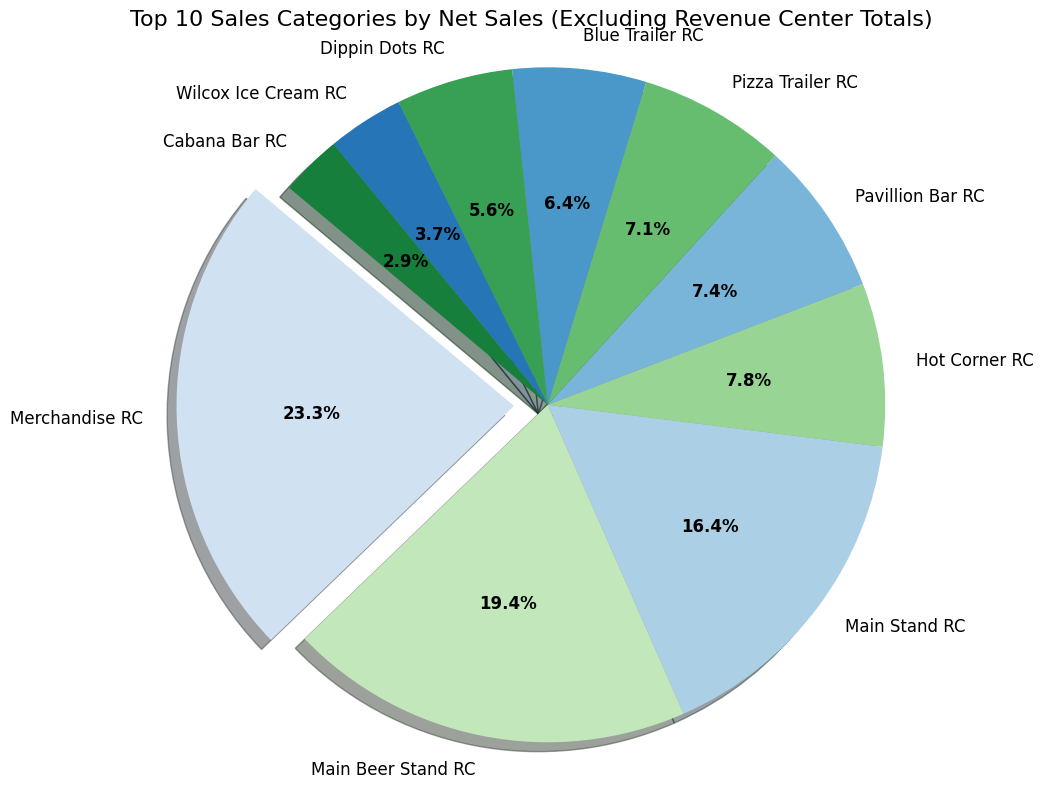

In [ ]:
# Defines shades of blue and green for the color palette
base_color_blue = '#003399'
base_color_green = '#009933'
num_colors = 10
blue_palette = [plt.cm.Blues(i) for i in np.linspace(0.2, 0.8, num_colors)]  # Portion generated by ChatGPT
green_palette = [plt.cm.Greens(i) for i in np.linspace(0.2, 0.8, num_colors)]  # Portion generated by ChatGPT

# Combines the blue and green palettes to create a new color palette
vt_colors = [blue_palette[i] if i % 2 == 0 else green_palette[i] for i in range(num_colors)]  # Portion generated by ChatGPT

# Defines a list of strings representing the revenue center totals
revenue_center_totals = ['Revenue Center #1 Total', 'Revenue Center #2 Total', 'Revenue Center #3 Total', 'Revenue Center #4 Total', 'Revenue Center #5 Total']

# Filters out rows containing any of the revenue center totals in the Sales Category column
sales_filtered = sales[~sales['Sales Category'].str.contains('|'.join(revenue_center_totals))]

# Groups the filtered DataFrame by sales category and sum the Net Sales column for each category
net_sales_by_category = sales_filtered.groupby('Sales Category')['Net Sales'].sum()

# Gets the top 10 sales categories by net sales
top_10_categories = net_sales_by_category.nlargest(10).sort_values(ascending=False)

# Plots the net sales for the top 10 sales categories as a pie chart
plt.figure(figsize=(10, 8))
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)  # Explodes the first slice
patches, texts, autotexts = plt.pie(top_10_categories, labels=top_10_categories.index, autopct='%1.1f%%', colors=vt_colors, shadow=True, explode=explode, startangle=140)
plt.title('Top 10 Sales Categories by Net Sales (Excluding Revenue Center Totals)', fontsize=16)
plt.setp(texts, size=12)
plt.setp(autotexts, size=12, weight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()


Checking the smallest amount of sales

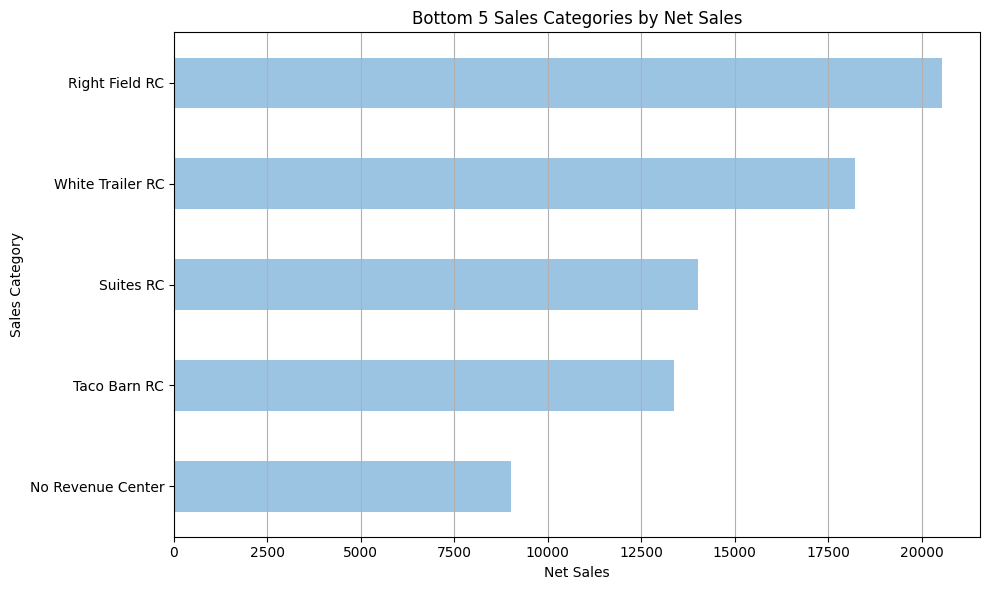

In [ ]:
# Defines a list of strings representing the revenue center totals
revenue_center_totals = ['Revenue Center #1 Total', 'Revenue Center #2 Total', 'Revenue Center #3 Total', 'Revenue Center #4 Total', 'Revenue Center #5 Total']

# Filters out rows containing any of the revenue center totals in the Sales Category column
sales_filtered = sales[~sales['Sales Category'].str.contains('|'.join(revenue_center_totals))]

# Groups the filtered DataFrame by sales category and sum the Net Sales column for each category
net_sales_by_category = sales_filtered.groupby('Sales Category')['Net Sales'].sum()

# Gets the bottom 5 sales categories by net sales
bottom_5_categories = net_sales_by_category.nsmallest(5).sort_values(ascending=True)

# Plots the net sales for the bottom 5 sales categories
plt.figure(figsize=(10, 6))
bottom_5_categories.plot(kind='barh', color=columbia_blue)
plt.title('Bottom 5 Sales Categories by Net Sales')
plt.xlabel('Net Sales')
plt.ylabel('Sales Category')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

## Changing datasets

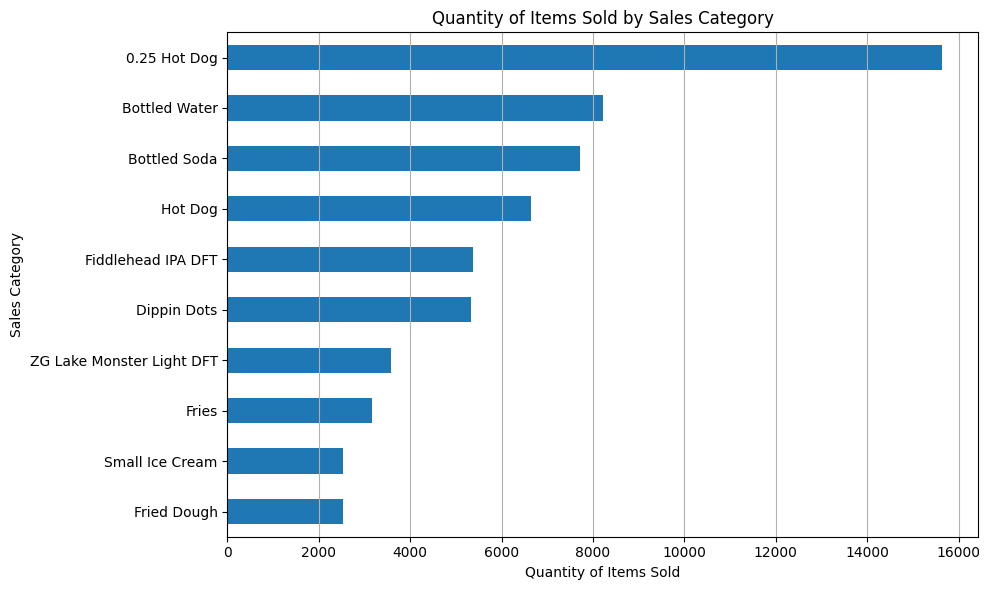

In [ ]:
# Groups the DataFrame by sales category and sum the Net Sales column for each category
net_items_by_category = items.groupby('Revenue Center')['Item Qty'].sum().sort_values()

# Gets the top 10 sales categories by net sales
top_10_items = net_items_by_category.nlargest(10).sort_values(ascending=True)

# Plot the net sales by sales category
plt.figure(figsize=(10, 6))
top_10_items.plot(kind='barh')
plt.title('Quantity of Items Sold by Sales Category')
plt.xlabel('Quantity of Items Sold')
plt.ylabel('Sales Category')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

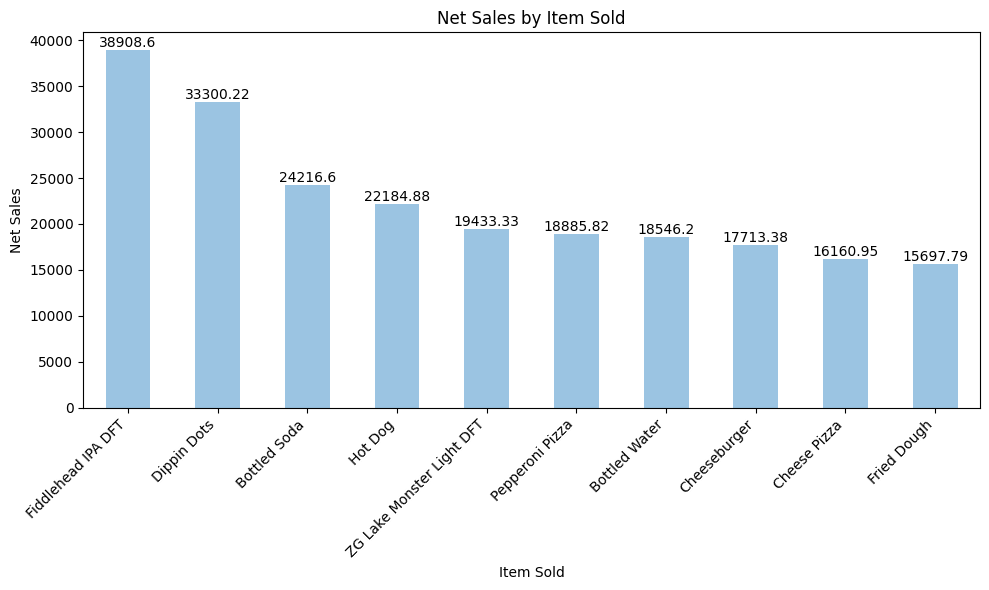

In [ ]:
# Defines a list of strings representing the revenue center totals
revenue_center_totals = ['Revenue Center #1 Total', 'Revenue Center #2 Total',
                         'Revenue Center #3 Total', 'Revenue Center #4 Total',
                         'Revenue Center #5 Total', 'Revenue Center #6 Total',
                         'Revenue Center #7 Total', 'Revenue Center #8 Total',
                         'Revenue Center #9 Total', 'Revenue Center #10 Total',
                         'Revenue Center #11 Total', 'Revenue Center #12 Total',
                         'Revenue Center #13 Total', 'Revenue Center #14 Total']

# Filters out rows containing any of the revenue center totals in the Sales Category column
items_filtered = items[~items['Revenue Center'].str.contains('|'.join(revenue_center_totals))]

# Groups data by Revenue Center and summs the Net Sales
revenue_center_sales = items_filtered.groupby('Revenue Center')['Net Sales'].sum()

# Sorts by Net Sales in descending order for better visualization
revenue_center_sales_sorted = revenue_center_sales.sort_values(ascending=False)

# Gets the top 10 sales categories by net sales
top_10_items = revenue_center_sales_sorted.nlargest(10)

# Creats the bar plot
plt.figure(figsize=(10, 6))
top_10_items.plot(kind='bar', color=columbia_blue)

# Labels the top of each bar with its corresponding value
for i, v in enumerate(top_10_items):
    plt.text(i, v , str(round(v, 2)), ha='center', va='bottom')
plt.title('Net Sales by Item Sold')
plt.xlabel('Item Sold')
plt.ylabel('Net Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


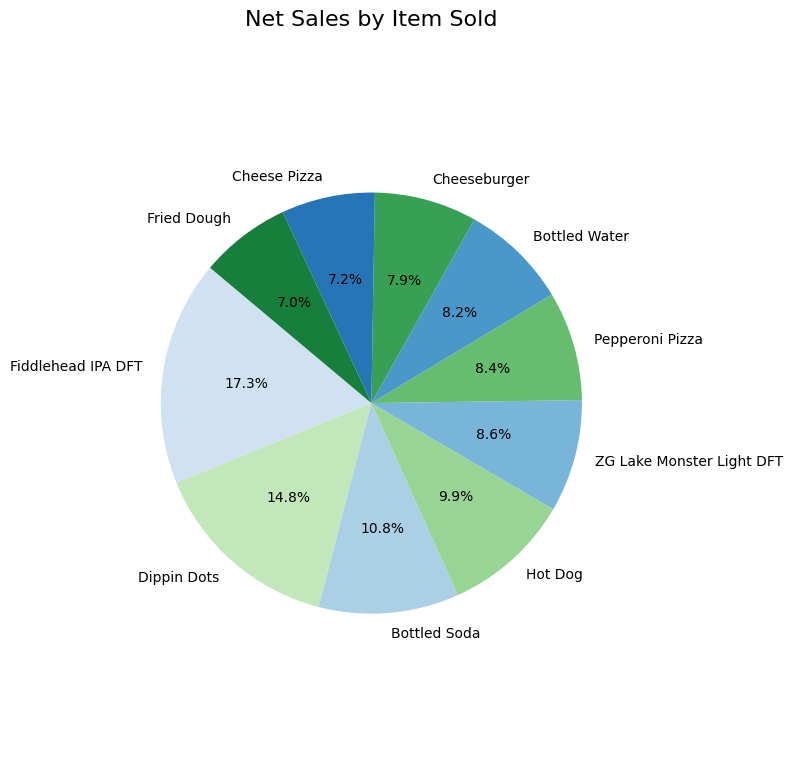

In [ ]:
# Defines colors in VT Lake Monsters theme (shades of blue and green)
base_color_blue = '#003399'
base_color_green = '#009933'
num_colors = 10
blue_palette = [plt.cm.Blues(i) for i in np.linspace(0.2, 0.8, num_colors)]  # Portion generated by ChatGPT
green_palette = [plt.cm.Greens(i) for i in np.linspace(0.2, 0.8, num_colors)]  # Portion generated by ChatGPT

# Combines the blue and green palettes to create a new color palette
vt_colors = [blue_palette[i] if i % 2 == 0 else green_palette[i] for i in range(num_colors)]  # Portion generated by ChatGPT

# Defines a list of strings representing the revenue center totals
revenue_center_totals = ['Revenue Center #1 Total', 'Revenue Center #2 Total',
                         'Revenue Center #3 Total', 'Revenue Center #4 Total',
                         'Revenue Center #5 Total', 'Revenue Center #6 Total',
                         'Revenue Center #7 Total', 'Revenue Center #8 Total',
                         'Revenue Center #9 Total', 'Revenue Center #10 Total',
                         'Revenue Center #11 Total', 'Revenue Center #12 Total',
                         'Revenue Center #13 Total', 'Revenue Center #14 Total']

# Filters out rows containing any of the revenue center totals in the Sales Category column
items_filtered = items[~items['Revenue Center'].str.contains('|'.join(revenue_center_totals))]

# Groups data by Revenue Center and summs the Net Sales
revenue_center_sales = items_filtered.groupby('Revenue Center')['Net Sales'].sum()

# Sorts by Net Sales in descending order for better visualization
revenue_center_sales_sorted = revenue_center_sales.sort_values(ascending=False)

# Gets the top 10 sales categories by net sales
top_10_items = revenue_center_sales_sorted.nlargest(10)

# Creates the pie chart with the VT Lake Monsters themed colors
plt.figure(figsize=(8, 8))
plt.pie(top_10_items, labels=top_10_items.index, autopct='%1.1f%%', colors=vt_colors, startangle=140)
plt.title('Net Sales by Item Sold', fontsize=16)
plt.axis('equal')
plt.tight_layout()
plt.show()

Least sold items

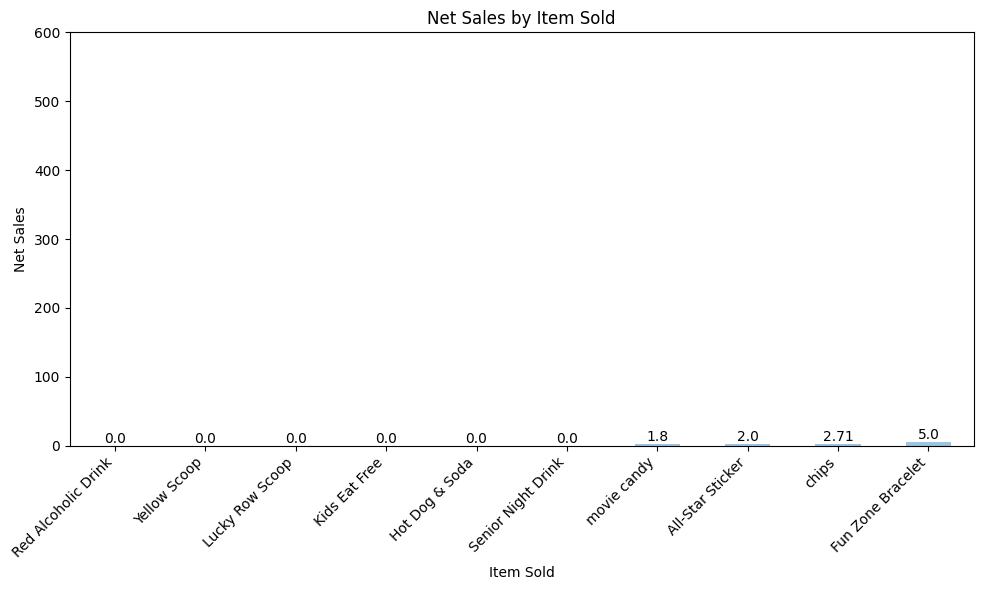

In [ ]:
# Defines a list of strings representing the revenue center totals
revenue_center_totals = ['Revenue Center #1 Total', 'Revenue Center #2 Total',
                         'Revenue Center #3 Total', 'Revenue Center #4 Total',
                         'Revenue Center #5 Total', 'Revenue Center #6 Total',
                         'Revenue Center #7 Total', 'Revenue Center #8 Total',
                         'Revenue Center #9 Total', 'Revenue Center #10 Total',
                         'Revenue Center #11 Total', 'Revenue Center #12 Total',
                         'Revenue Center #13 Total', 'Revenue Center #14 Total']

# Filters out rows containing any of the revenue center totals in the Sales Category column
items_filtered = items[~items['Revenue Center'].str.contains('|'.join(revenue_center_totals))]

# Groups data by Revenue Center and summs the Net Sales
revenue_center_sales = items_filtered.groupby('Revenue Center')['Net Sales'].sum()

# Sorts by Net Sales in descending order
revenue_center_sales_sorted = revenue_center_sales.sort_values(ascending=False)

# Gets the bottom 10 sales categories by net sales
bottom_10_items = revenue_center_sales_sorted.nsmallest(10)

# Creates the bar plot
plt.figure(figsize=(10, 6))
bottom_10_items.plot(kind='bar', color=columbia_blue)

# Labels the top of each bar with its corresponding value
for i, v in enumerate(bottom_10_items):
    plt.text(i, v , str(round(v, 2)), ha='center', va='bottom')

plt.title('Net Sales by Item Sold')
plt.xlabel('Item Sold')
plt.ylabel('Net Sales')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 600)
plt.tight_layout()
plt.show()


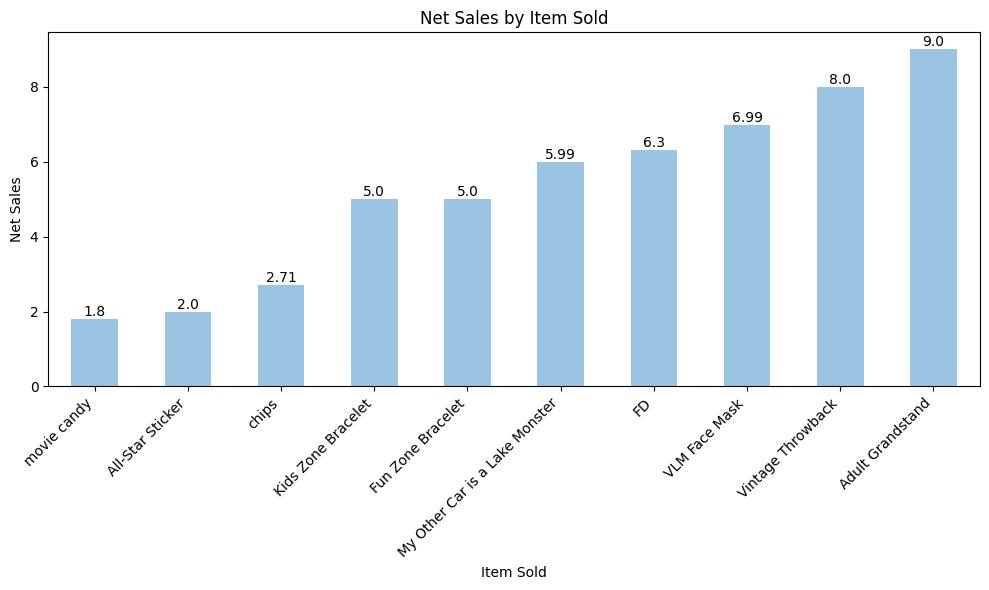

In [ ]:
# Defines a list of strings representing the revenue center totals
revenue_center_totals = ['Revenue Center #1 Total', 'Revenue Center #2 Total',
                         'Revenue Center #3 Total', 'Revenue Center #4 Total',
                         'Revenue Center #5 Total', 'Revenue Center #6 Total',
                         'Revenue Center #7 Total', 'Revenue Center #8 Total',
                         'Revenue Center #9 Total', 'Revenue Center #10 Total',
                         'Revenue Center #11 Total', 'Revenue Center #12 Total',
                         'Revenue Center #13 Total', 'Revenue Center #14 Total']

# Filters out rows containing any of the revenue center totals in the Sales Category column
items_filtered = items[~items['Revenue Center'].str.contains('|'.join(revenue_center_totals))]

# Filters out rows with Net Sales greater than 0
items_filtered_positive = items_filtered[items_filtered['Net Sales'] > 0]

# Groups data by Revenue Center and summs the Net Sales
revenue_center_sales = items_filtered_positive.groupby('Revenue Center')['Net Sales'].sum()

# Sorts by Net Sales in descending order for better visualization
revenue_center_sales_sorted = revenue_center_sales.sort_values(ascending=False)

# Gets the top 10 sales categories by net sales
top_10_items = revenue_center_sales_sorted.nsmallest(10)

# Creats the bar plot
plt.figure(figsize=(10, 6))
top_10_items.plot(kind='bar', color=columbia_blue)

# Labels the top of each bar with its corresponding value
for i, v in enumerate(top_10_items):
    plt.text(i, v , str(round(v, 2)), ha='center', va='bottom')
plt.title('Net Sales by Item Sold')
plt.xlabel('Item Sold')
plt.ylabel('Net Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Visualizations

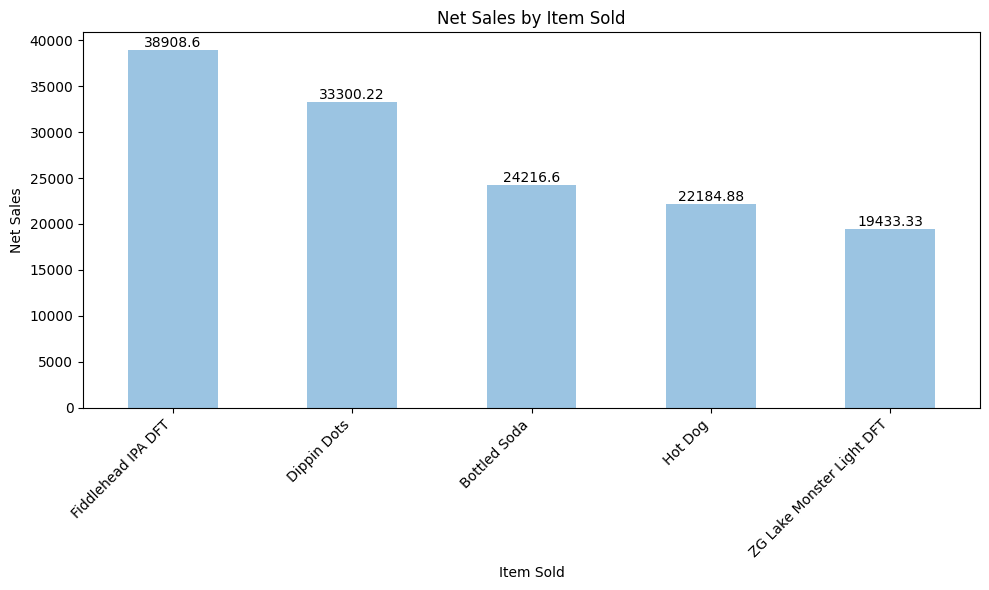

In [ ]:
# Defines a list of strings representing the revenue center totals
revenue_center_totals = ['Revenue Center #1 Total', 'Revenue Center #2 Total',
                         'Revenue Center #3 Total', 'Revenue Center #4 Total',
                         'Revenue Center #5 Total', 'Revenue Center #6 Total',
                         'Revenue Center #7 Total', 'Revenue Center #8 Total',
                         'Revenue Center #9 Total', 'Revenue Center #10 Total',
                         'Revenue Center #11 Total', 'Revenue Center #12 Total',
                         'Revenue Center #13 Total', 'Revenue Center #14 Total']

# Filters out rows containing any of the revenue center totals in the Sales Category column
items_filtered = items[~items['Revenue Center'].str.contains('|'.join(revenue_center_totals))]

# Groups data by Revenue Center and summs the Net Sales
revenue_center_sales = items_filtered.groupby('Revenue Center')['Net Sales'].sum()

# Sorts by Net Sales in descending order for better visualization
revenue_center_sales_sorted = revenue_center_sales.sort_values(ascending=False)

# Gets the top 10 sales categories by net sales
top_5_items = revenue_center_sales_sorted.nlargest(5)

# Creates the bar plot
plt.figure(figsize=(10, 6))
top_5_items.plot(kind='bar', color=columbia_blue)

# Labels the top of each bar with its corresponding value
for i, v in enumerate(top_5_items):
    plt.text(i, v , str(round(v, 2)), ha='center', va='bottom')
plt.title('Net Sales by Item Sold')
plt.xlabel('Item Sold')
plt.ylabel('Net Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


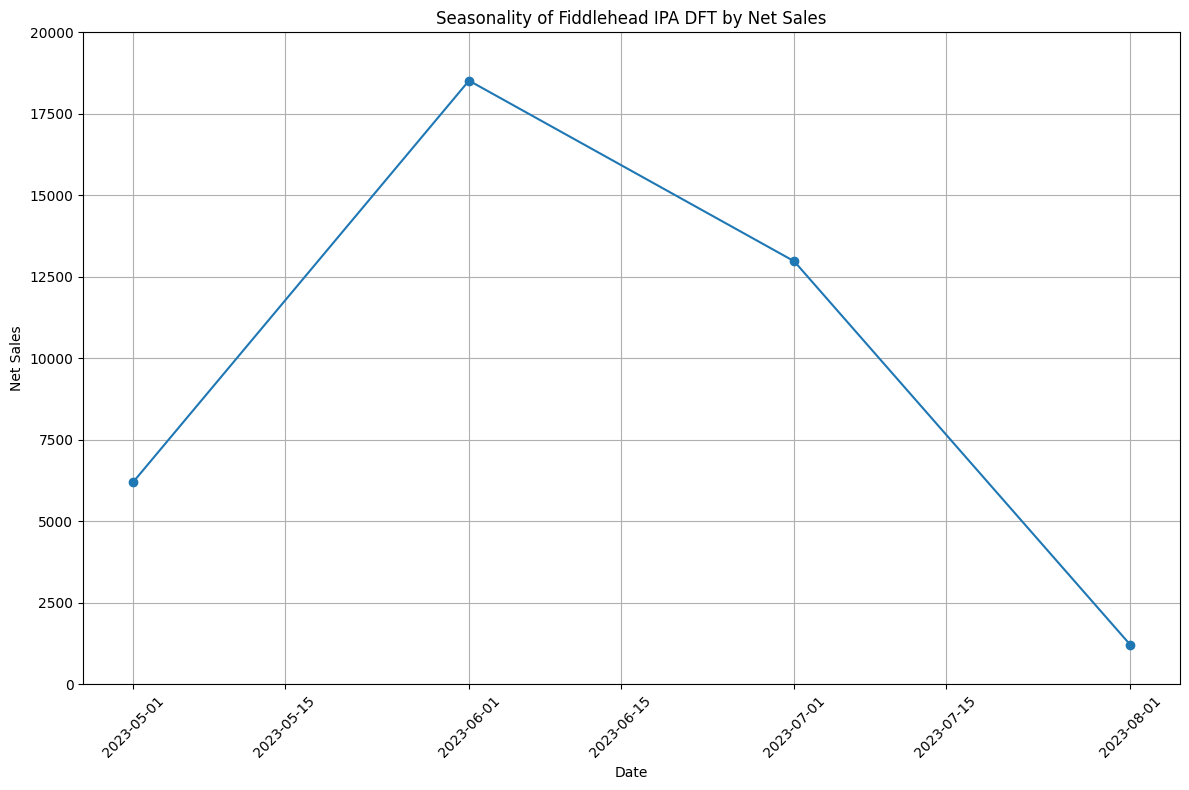

In [ ]:
# Grouping data by item name and summs the net sales
item_sales = items_filtered.groupby('Revenue Center')['Net Sales'].sum()

# Sorting items by net sales in descending order and selecting the top 1
top_item = item_sales.idxmax()

# Filtering the data for the top item
filtered_data = items_filtered[items_filtered['Revenue Center'] == top_item].copy()
filtered_data['date'] = pd.to_datetime(filtered_data['date'])
filtered_data['Month'] = filtered_data['date'].dt.month
filtered_data['Year'] = filtered_data['date'].dt.year

# Grouping data by month and summs the net sales
monthly_sales = filtered_data.groupby(['Year', 'Month'])['Net Sales'].sum()

# Converting the index to a datetime object
monthly_sales.index = pd.to_datetime(monthly_sales.index.map(lambda x: f'{x[0]}-{x[1]}'))

# Sorting the index
monthly_sales = monthly_sales.sort_index()

# Filtering the data for the top item
top_item_data = items_filtered[items_filtered['Revenue Center'] == top_item].copy()

# Assuming there's a Revenue Center column, retrieve the corresponding value for the top item
top_item_revenue_center = top_item_data['Revenue Center'].iloc[0]

# Plotting
plt.figure(figsize=(12, 8))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o')
plt.title(f'Seasonality of {top_item_revenue_center} by Net Sales')
plt.xlabel('Date')
plt.ylabel('Net Sales')
plt.ylim(0, 20000)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


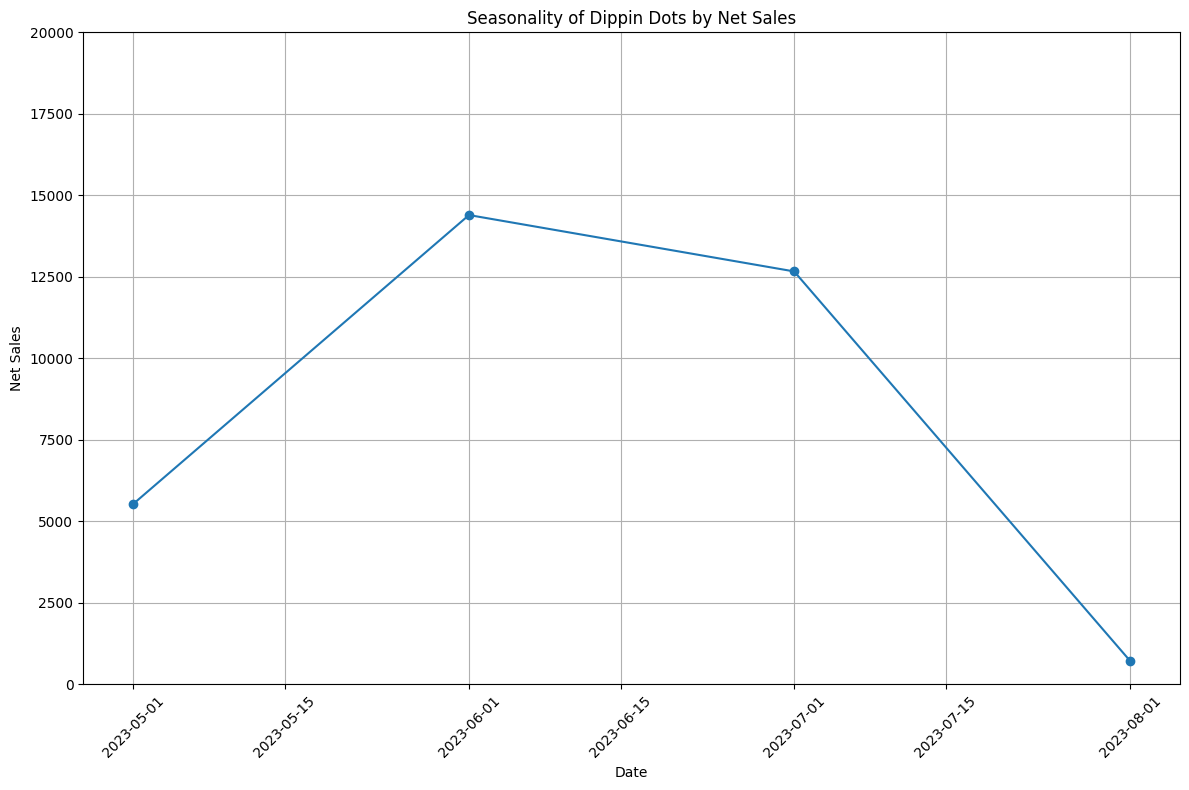

In [ ]:
# Sorting items by net sales in descending order and selects the top 2
top_2_items = item_sales.nlargest(2).index.tolist()

# Filtering the data for the second top item
second_top_item = top_2_items[1]
filtered_data = items_filtered[items_filtered['Revenue Center'] == second_top_item].copy()
filtered_data['date'] = pd.to_datetime(filtered_data['date'])
filtered_data['Month'] = filtered_data['date'].dt.month
filtered_data['Year'] = filtered_data['date'].dt.year

# Grouping data by month and summs the net sales
monthly_sales = filtered_data.groupby(['Year', 'Month'])['Net Sales'].sum()

# Converting the index to a datetime object
monthly_sales.index = pd.to_datetime(monthly_sales.index.map(lambda x: f'{x[0]}-{x[1]}'))

# Sorting the index
monthly_sales = monthly_sales.sort_index()

# Filtering the data for the second top item
second_top_item_data = items_filtered[items_filtered['Revenue Center'] == second_top_item].copy()

# Assuming there's a Revenue Center column, retrieve the corresponding value for the second top item
second_top_item_revenue_center = second_top_item_data['Revenue Center'].iloc[0]

# Plotting
plt.figure(figsize=(12, 8))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o')
plt.title(f'Seasonality of {second_top_item_revenue_center} by Net Sales')
plt.xlabel('Date')
plt.ylabel('Net Sales')
plt.ylim(0, 20000)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

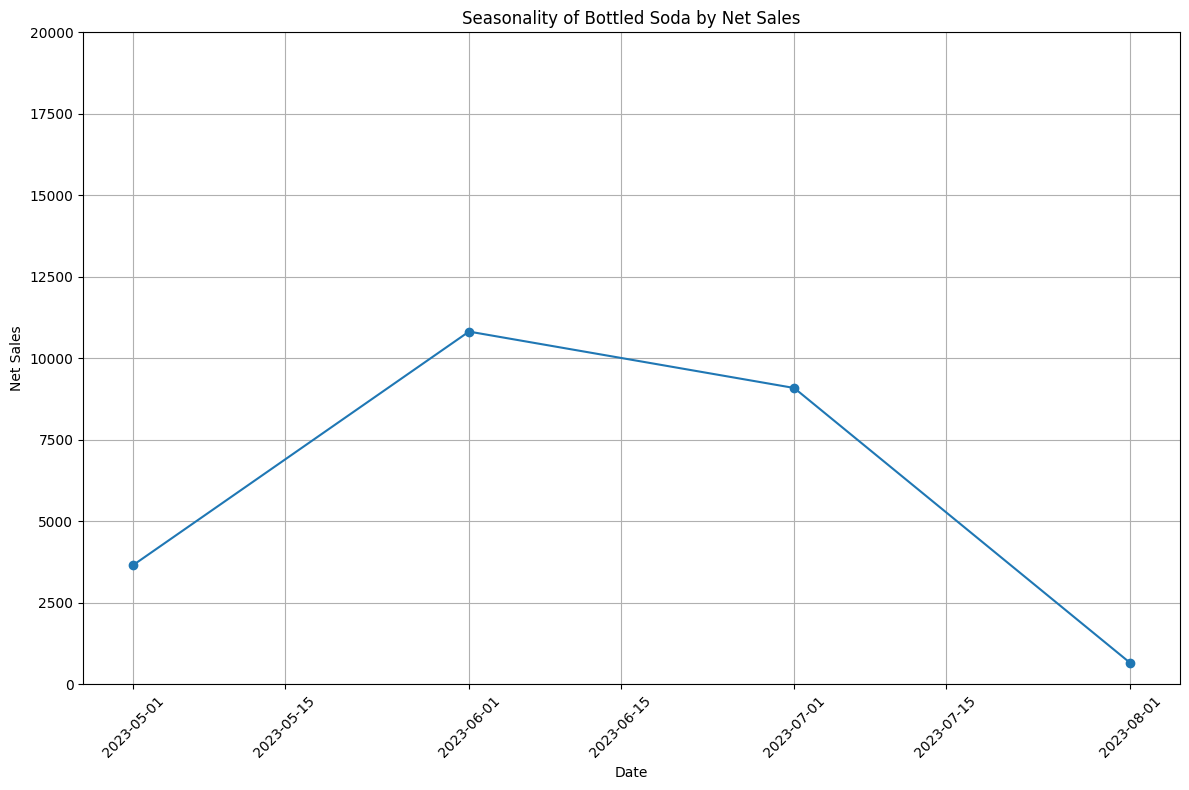

In [ ]:
# Sorting items by net sales in descending order and selecting the top 3
top_3_items = item_sales.nlargest(3).index.tolist()

# Filter the data for the third top item
third_top_item = top_3_items[2]
filtered_data = items_filtered[items_filtered['Revenue Center'] == third_top_item].copy()
filtered_data['date'] = pd.to_datetime(filtered_data['date'])
filtered_data['Month'] = filtered_data['date'].dt.month
filtered_data['Year'] = filtered_data['date'].dt.year

# Grouping data by month and summs the net sales
monthly_sales = filtered_data.groupby(['Year', 'Month'])['Net Sales'].sum()

# Converting the index to a datetime object
monthly_sales.index = pd.to_datetime(monthly_sales.index.map(lambda x: f'{x[0]}-{x[1]}'))

# Sorting the index
monthly_sales = monthly_sales.sort_index()

# Filtering the data for the third top item
third_top_item_data = items_filtered[items_filtered['Revenue Center'] == third_top_item].copy()

# Assuming there's a Revenue Center column, retrieve the corresponding value for the third top item
third_top_item_revenue_center = third_top_item_data['Revenue Center'].iloc[0]

# Plotting
plt.figure(figsize=(12, 8))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o')
plt.title(f'Seasonality of {third_top_item_revenue_center} by Net Sales')
plt.xlabel('Date')
plt.ylabel('Net Sales')
plt.ylim(0, 20000)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

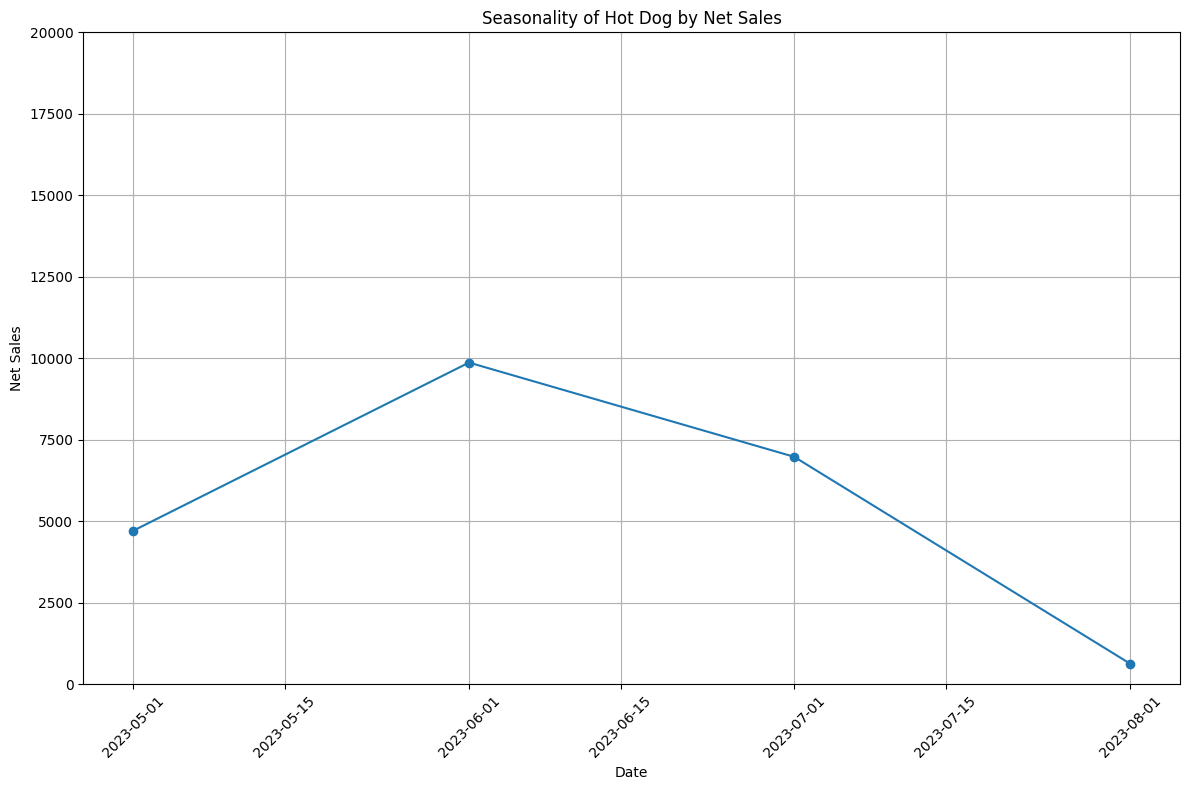

In [ ]:
# Sorting items by net sales in descending order and selecting the top 4
top_4_items = item_sales.nlargest(4).index.tolist()

# Filtering the data for the fourth top item
fourth_top_item = top_4_items[3]
filtered_data = items_filtered[items_filtered['Revenue Center'] == fourth_top_item].copy()
filtered_data['date'] = pd.to_datetime(filtered_data['date'])
filtered_data['Month'] = filtered_data['date'].dt.month
filtered_data['Year'] = filtered_data['date'].dt.year

# Grouping data by month and summing the net sales
monthly_sales = filtered_data.groupby(['Year', 'Month'])['Net Sales'].sum()

# Converting the index to a datetime object
monthly_sales.index = pd.to_datetime(monthly_sales.index.map(lambda x: f'{x[0]}-{x[1]}'))

# Sorting the index
monthly_sales = monthly_sales.sort_index()

# Filtering the data for the fourth top item
fourth_top_item_data = items_filtered[items_filtered['Revenue Center'] == fourth_top_item].copy()

# Assuming there's a 'Revenue Center' column, retrieve the corresponding value for the fourth top item
fourth_top_item_revenue_center = fourth_top_item_data['Revenue Center'].iloc[0]

# Plotting
plt.figure(figsize=(12, 8))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o')
plt.title(f'Seasonality of {fourth_top_item_revenue_center} by Net Sales')
plt.xlabel('Date')
plt.ylabel('Net Sales')
plt.ylim(0, 20000)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

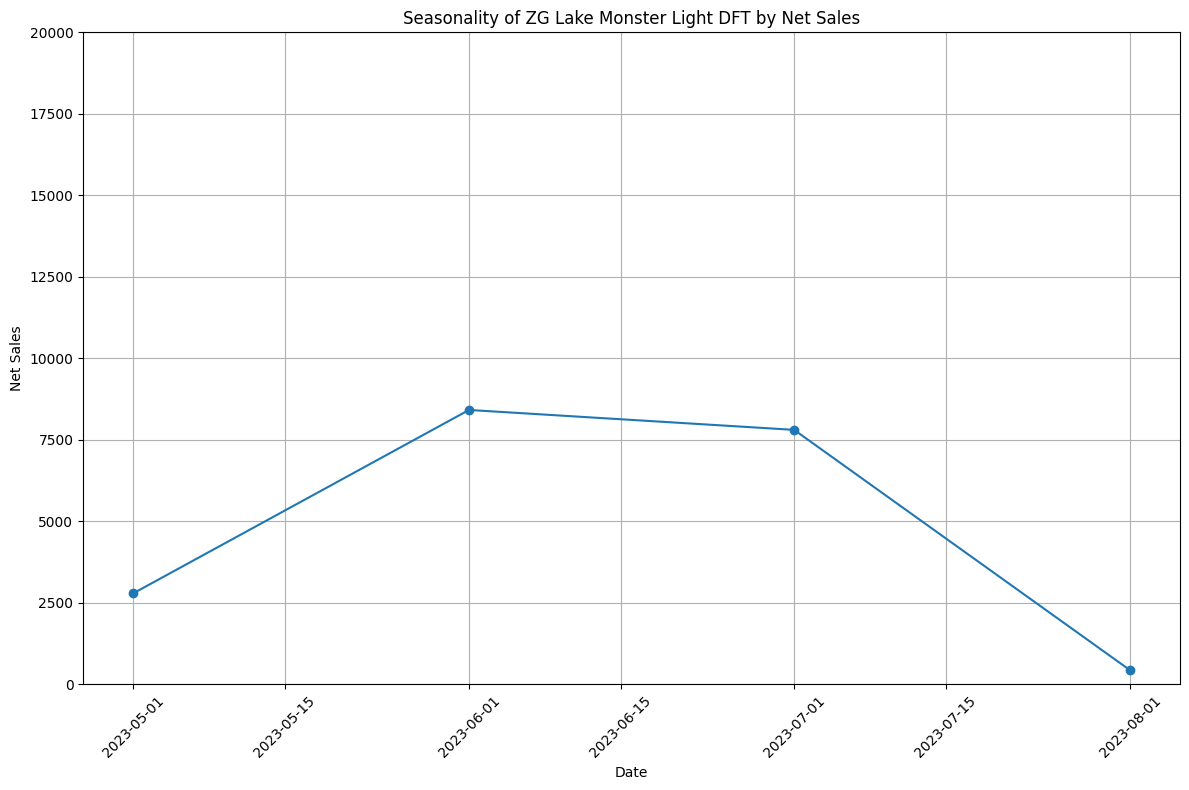

In [ ]:
# Sorting items by net sales in descending order and selecting the top 5
top_5_items = item_sales.nlargest(5).index.tolist()

# Filtering the data for the fifth top item
fifth_top_item = top_5_items[4]
filtered_data = items_filtered[items_filtered['Revenue Center'] == fifth_top_item].copy()
filtered_data['date'] = pd.to_datetime(filtered_data['date'])
filtered_data['Month'] = filtered_data['date'].dt.month
filtered_data['Year'] = filtered_data['date'].dt.year

# Grouping data by month and summing the net sales
monthly_sales = filtered_data.groupby(['Year', 'Month'])['Net Sales'].sum()

# Converting the index to a datetime object
monthly_sales.index = pd.to_datetime(monthly_sales.index.map(lambda x: f'{x[0]}-{x[1]}'))

# Sorting the index
monthly_sales = monthly_sales.sort_index()

# Filtering the data for the fifth top item
fifth_top_item_data = items_filtered[items_filtered['Revenue Center'] == fifth_top_item].copy()

# Assuming there's a 'Revenue Center' column, retrieve the corresponding value for the fifth top item
fifth_top_item_revenue_center = fifth_top_item_data['Revenue Center'].iloc[0]

# Plotting
plt.figure(figsize=(12, 8))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o')
plt.title(f'Seasonality of {fifth_top_item_revenue_center} by Net Sales')
plt.xlabel('Date')
plt.ylabel('Net Sales')
plt.ylim(0, 20000)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

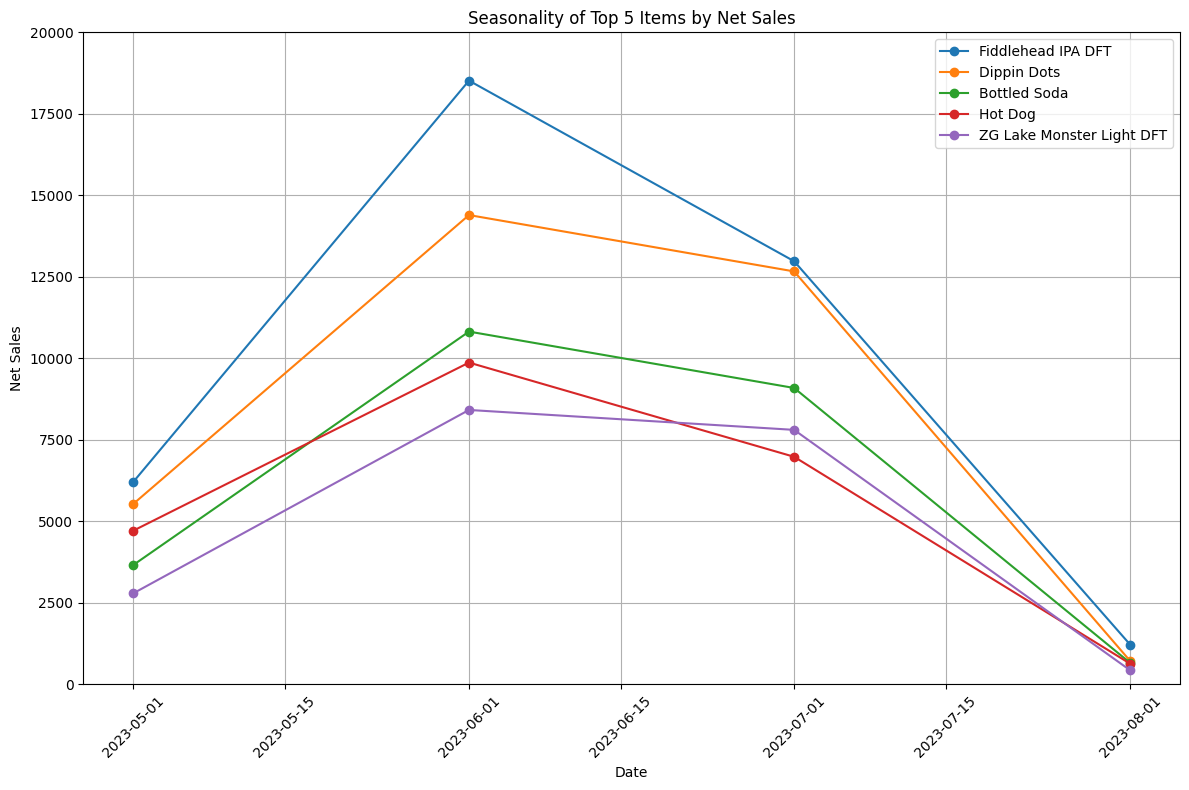

In [ ]:
# Sorting items by net sales in descending order and selecting the top 5
top_5_items = item_sales.nlargest(5).index.tolist()

plt.figure(figsize=(12, 8))

# Loops through each item and plot its data
for item in top_5_items:
    # Filters the data for the current item
    item_data = items_filtered[items_filtered['Revenue Center'] == item].copy()
    item_data['date'] = pd.to_datetime(item_data['date'])
    item_data['Month'] = item_data['date'].dt.month
    item_data['Year'] = item_data['date'].dt.year

    # Groups data by month and summs the net sales
    monthly_sales = item_data.groupby(['Year', 'Month'])['Net Sales'].sum()

    # Converts the index to a datetime object
    monthly_sales.index = pd.to_datetime(monthly_sales.index.map(lambda x: f'{x[0]}-{x[1]}'))

    # Sorts the index
    monthly_sales = monthly_sales.sort_index()

    # Plots
    plt.plot(monthly_sales.index, monthly_sales.values, marker='o', label=f'{item}')

plt.title('Seasonality of Top 5 Items by Net Sales')
plt.xlabel('Date')
plt.ylabel('Net Sales')
plt.xticks(rotation=45)
plt.ylim(0, 20000)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Sales Data

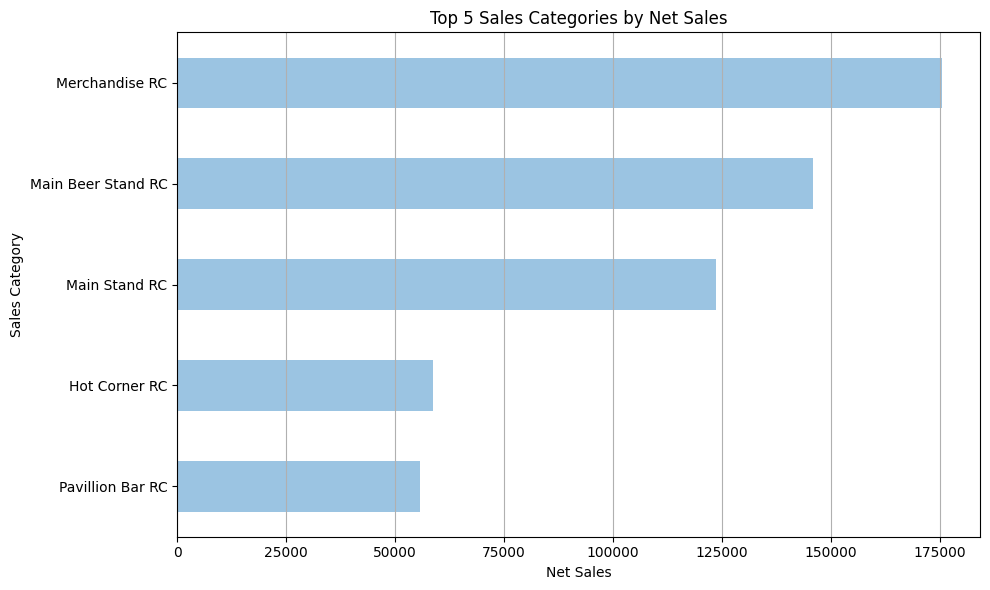

In [ ]:
# Defines a list of strings representing the revenue center totals
revenue_center_totals = ['Revenue Center #1 Total', 'Revenue Center #2 Total', 'Revenue Center #3 Total', 'Revenue Center #4 Total', 'Revenue Center #5 Total']

# Filters out rows containing any of the revenue center totals in the Sales Category column
sales_filtered = sales[~sales['Sales Category'].str.contains('|'.join(revenue_center_totals))]

# Groups the filtered DataFrame by sales category and sum the 'Net Sales' column for each category
net_sales_by_category = sales_filtered.groupby('Sales Category')['Net Sales'].sum()

# Gets the top 5 sales categories by net sales
top_5_categories = net_sales_by_category.nlargest(5).sort_values(ascending=True)

# Plots the net sales for the top 5 sales categories
plt.figure(figsize=(10, 6))
top_5_categories.plot(kind='barh', color=columbia_blue)
plt.title('Top 5 Sales Categories by Net Sales')
plt.xlabel('Net Sales')
plt.ylabel('Sales Category')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

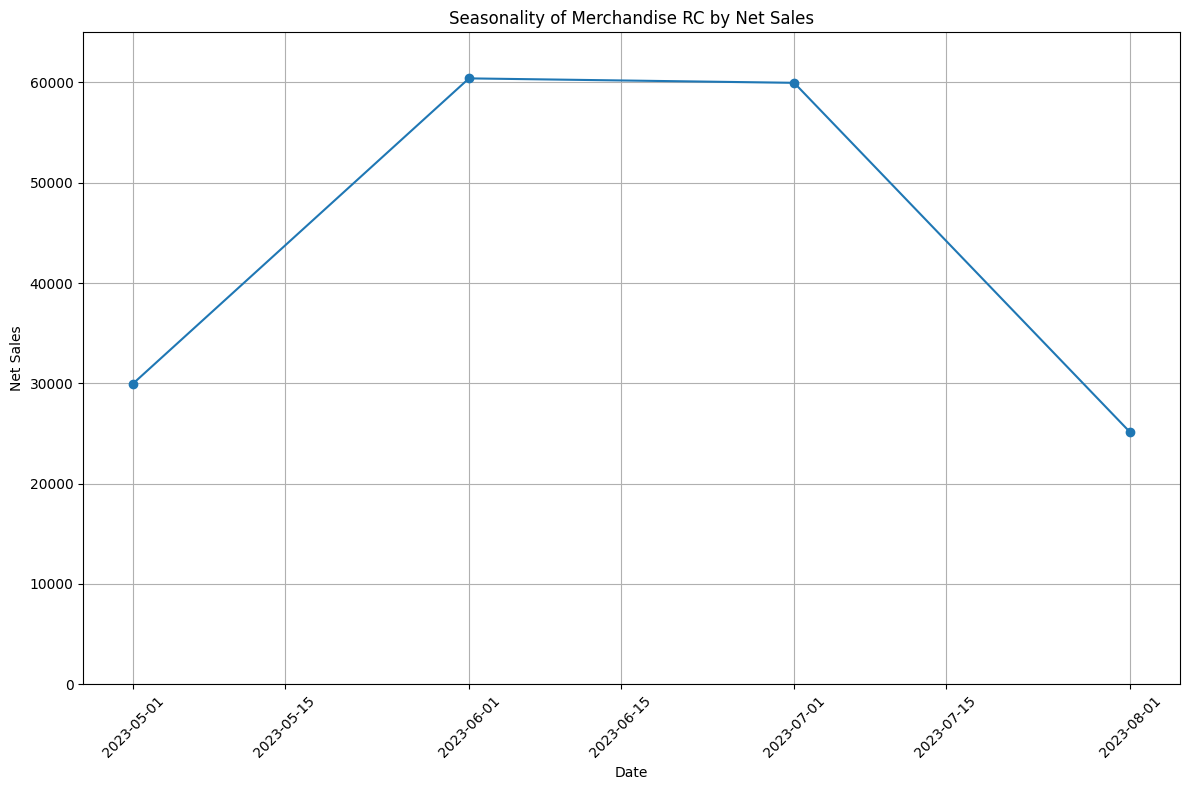

In [ ]:
# Groups data by item name and summs the net sales
sales_center = sales_filtered.groupby('Sales Category')['Net Sales'].sum()

# Sorts items by net sales in descending order and selects the top 1
top_5_items = sales_center.nlargest(5).index.tolist()

# Filters the data for the second top item
sales_top_item = top_5_items[0]
filtered_data = sales_filtered[sales_filtered['Sales Category'] == sales_top_item].copy()
filtered_data['date'] = pd.to_datetime(filtered_data['date'])
filtered_data['Month'] = filtered_data['date'].dt.month
filtered_data['Year'] = filtered_data['date'].dt.year

# Groups data by month and summs the net sales
monthly_sales = filtered_data.groupby(['Year', 'Month'])['Net Sales'].sum()

# Converts the index to a datetime object
monthly_sales.index = pd.to_datetime(monthly_sales.index.map(lambda x: f'{x[0]}-{x[1]}'))

# Sorts the index
monthly_sales = monthly_sales.sort_index()

# Filters the data for the top item
first_top_sales_data = sales_filtered[sales_filtered['Sales Category'] == sales_top_item].copy()

# Assuming there's a 'Revenue Center' column, retrieve the corresponding value for the top item
first_top_sales_category = first_top_sales_data['Sales Category'].iloc[0]

# Plotting
plt.figure(figsize=(12, 8))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o')
plt.title(f'Seasonality of {first_top_sales_category} by Net Sales')
plt.xlabel('Date')
plt.ylabel('Net Sales')
plt.ylim(0, 65000)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


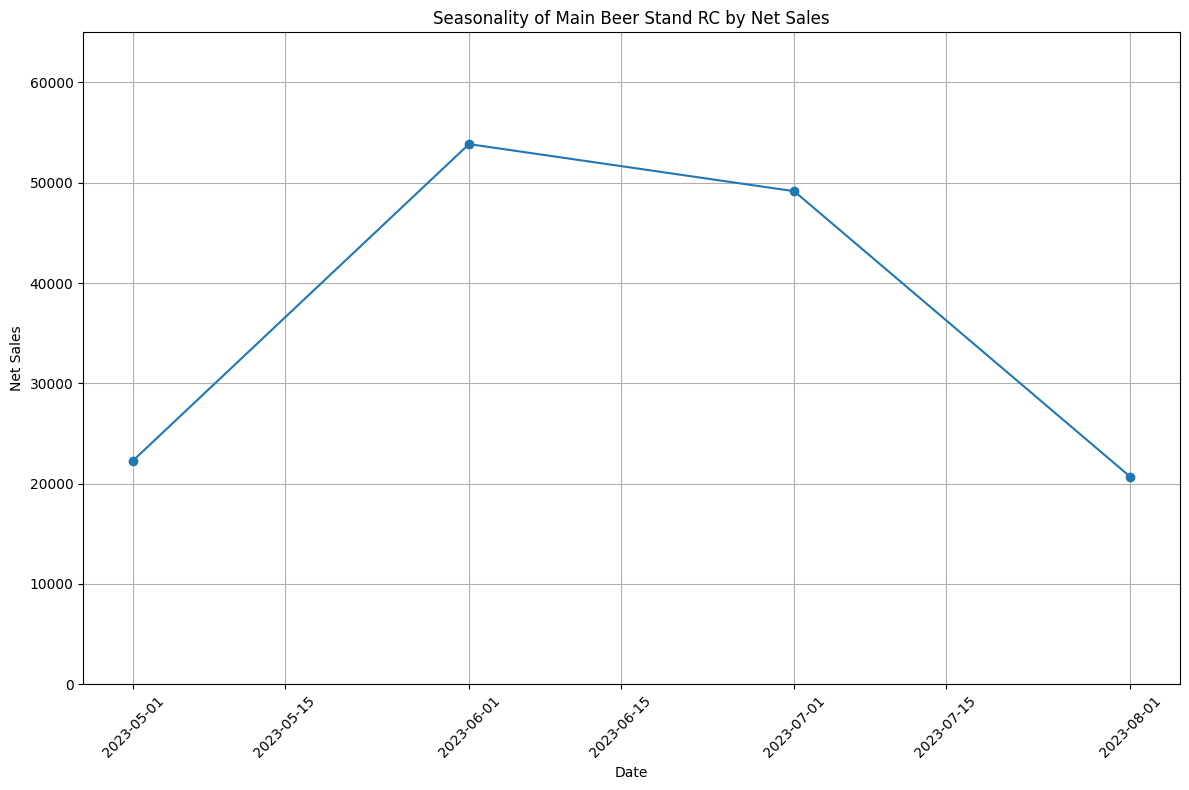

In [ ]:
# Groups data by item name and summs the net sales
sales_center = sales_filtered.groupby('Sales Category')['Net Sales'].sum()

# Sorts items by net sales in descending order and selects the top 2
top_5_items = sales_center.nlargest(5).index.tolist()

# Filters the data for the second top item
sales_2nd_item = top_5_items[1]
filtered_data = sales_filtered[sales_filtered['Sales Category'] == sales_2nd_item].copy()
filtered_data['date'] = pd.to_datetime(filtered_data['date'])
filtered_data['Month'] = filtered_data['date'].dt.month
filtered_data['Year'] = filtered_data['date'].dt.year

# Groups data by month and summs the net sales
monthly_sales = filtered_data.groupby(['Year', 'Month'])['Net Sales'].sum()

# Converts the index to a datetime object
monthly_sales.index = pd.to_datetime(monthly_sales.index.map(lambda x: f'{x[0]}-{x[1]}'))

# Sorts the index
monthly_sales = monthly_sales.sort_index()

# Filters the data for the second top item
first_top_sales_data = sales_filtered[sales_filtered['Sales Category'] == sales_2nd_item].copy()

# Assuming there's a 'Revenue Center' column, retrieve the corresponding value for the second top item
first_top_sales_category = first_top_sales_data['Sales Category'].iloc[0]

# Plots
plt.figure(figsize=(12, 8))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o')
plt.title(f'Seasonality of {first_top_sales_category} by Net Sales')
plt.xlabel('Date')
plt.ylabel('Net Sales')
plt.ylim(0, 65000)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


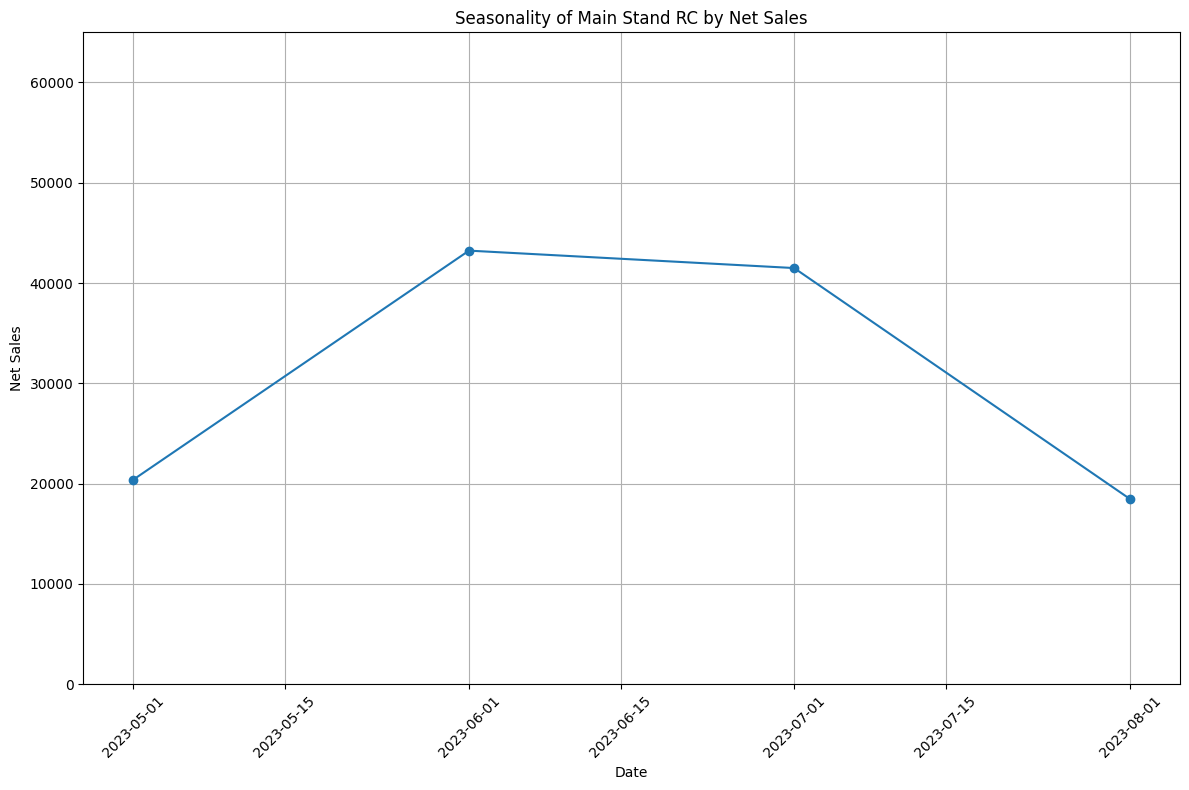

In [ ]:
# Groups data by item name and summs the net sales
sales_center = sales_filtered.groupby('Sales Category')['Net Sales'].sum()

# Sorts items by net sales in descending order and selects the top 3
top_5_items = sales_center.nlargest(5).index.tolist()

# Filters the data for the third top item
sales_3rd_item = top_5_items[2]
filtered_data = sales_filtered[sales_filtered['Sales Category'] == sales_3rd_item].copy()
filtered_data['date'] = pd.to_datetime(filtered_data['date'])
filtered_data['Month'] = filtered_data['date'].dt.month
filtered_data['Year'] = filtered_data['date'].dt.year

# Groups data by month and summs the net sales
monthly_sales = filtered_data.groupby(['Year', 'Month'])['Net Sales'].sum()

# Converts the index to a datetime object
monthly_sales.index = pd.to_datetime(monthly_sales.index.map(lambda x: f'{x[0]}-{x[1]}'))

# Sorts the index
monthly_sales = monthly_sales.sort_index()

# Filters the data for the third top item
first_top_sales_data = sales_filtered[sales_filtered['Sales Category'] == sales_3rd_item].copy()

# Assuming there's a 'Revenue Center' column, retrieve the corresponding value for the third top item
first_top_sales_category = first_top_sales_data['Sales Category'].iloc[0]

# Plots
plt.figure(figsize=(12, 8))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o')
plt.title(f'Seasonality of {first_top_sales_category} by Net Sales')
plt.xlabel('Date')
plt.ylabel('Net Sales')
plt.ylim(0, 65000)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


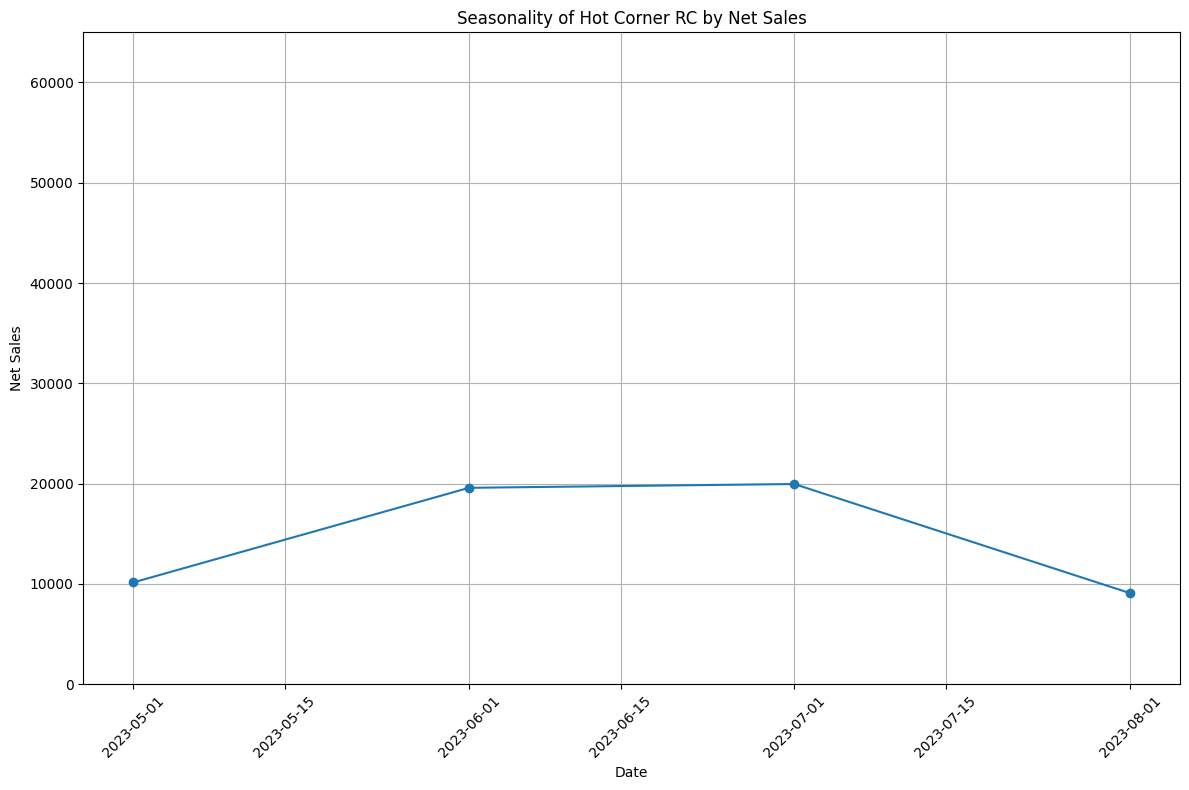

In [ ]:
# Groups data by item name and summs the net sales
sales_center = sales_filtered.groupby('Sales Category')['Net Sales'].sum()

# Sorts items by net sales in descending order and selects the top 4
top_5_items = sales_center.nlargest(5).index.tolist()

# Filters the data for the fourth top item
sales_4th_item = top_5_items[3]
filtered_data = sales_filtered[sales_filtered['Sales Category'] == sales_4th_item].copy()
filtered_data['date'] = pd.to_datetime(filtered_data['date'])
filtered_data['Month'] = filtered_data['date'].dt.month
filtered_data['Year'] = filtered_data['date'].dt.year

# Groups data by month and summing the net sales
monthly_sales = filtered_data.groupby(['Year', 'Month'])['Net Sales'].sum()

# Converts the index to a datetime object
monthly_sales.index = pd.to_datetime(monthly_sales.index.map(lambda x: f'{x[0]}-{x[1]}'))

# Sorts the index
monthly_sales = monthly_sales.sort_index()

# Filters the data for the fourth top item
first_top_sales_data = sales_filtered[sales_filtered['Sales Category'] == sales_4th_item].copy()

# Assuming there's a 'Revenue Center' column, retrieve the corresponding value for the fourth top item
first_top_sales_category = first_top_sales_data['Sales Category'].iloc[0]

# Plots
plt.figure(figsize=(12, 8))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o')
plt.title(f'Seasonality of {first_top_sales_category} by Net Sales')
plt.xlabel('Date')
plt.ylabel('Net Sales')
plt.ylim(0, 65000)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


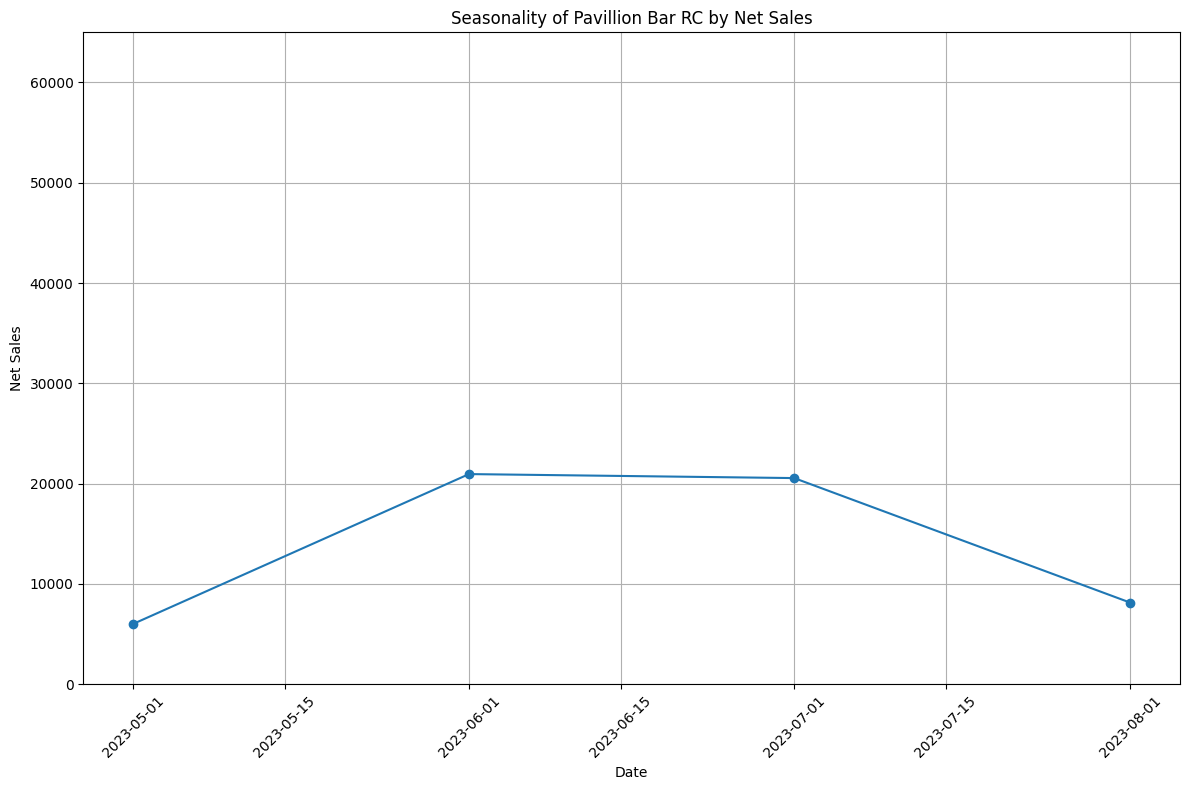

In [ ]:
# Groups data by item name and summs the net sales
sales_center = sales_filtered.groupby('Sales Category')['Net Sales'].sum()

# Sorts items by net sales in descending order and selects the top 5
top_5_items = sales_center.nlargest(5).index.tolist()

# Filters the data for the fifth top item
sales_5th_item = top_5_items[4]
filtered_data = sales_filtered[sales_filtered['Sales Category'] == sales_5th_item].copy()
filtered_data['date'] = pd.to_datetime(filtered_data['date'])
filtered_data['Month'] = filtered_data['date'].dt.month
filtered_data['Year'] = filtered_data['date'].dt.year

# Groups data by month and summs the net sales
monthly_sales = filtered_data.groupby(['Year', 'Month'])['Net Sales'].sum()

# Converts the index to a datetime object
monthly_sales.index = pd.to_datetime(monthly_sales.index.map(lambda x: f'{x[0]}-{x[1]}'))

# Sorts the index
monthly_sales = monthly_sales.sort_index()

# Filters the data for the fifth top item
first_top_sales_data = sales_filtered[sales_filtered['Sales Category'] == sales_5th_item].copy()

# Assuming there's a 'Revenue Center' column, retrieve the corresponding value for the fifth top item
first_top_sales_category = first_top_sales_data['Sales Category'].iloc[0]

# Plots
plt.figure(figsize=(12, 8))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o')
plt.title(f'Seasonality of {first_top_sales_category} by Net Sales')
plt.xlabel('Date')
plt.ylabel('Net Sales')
plt.ylim(0, 65000)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


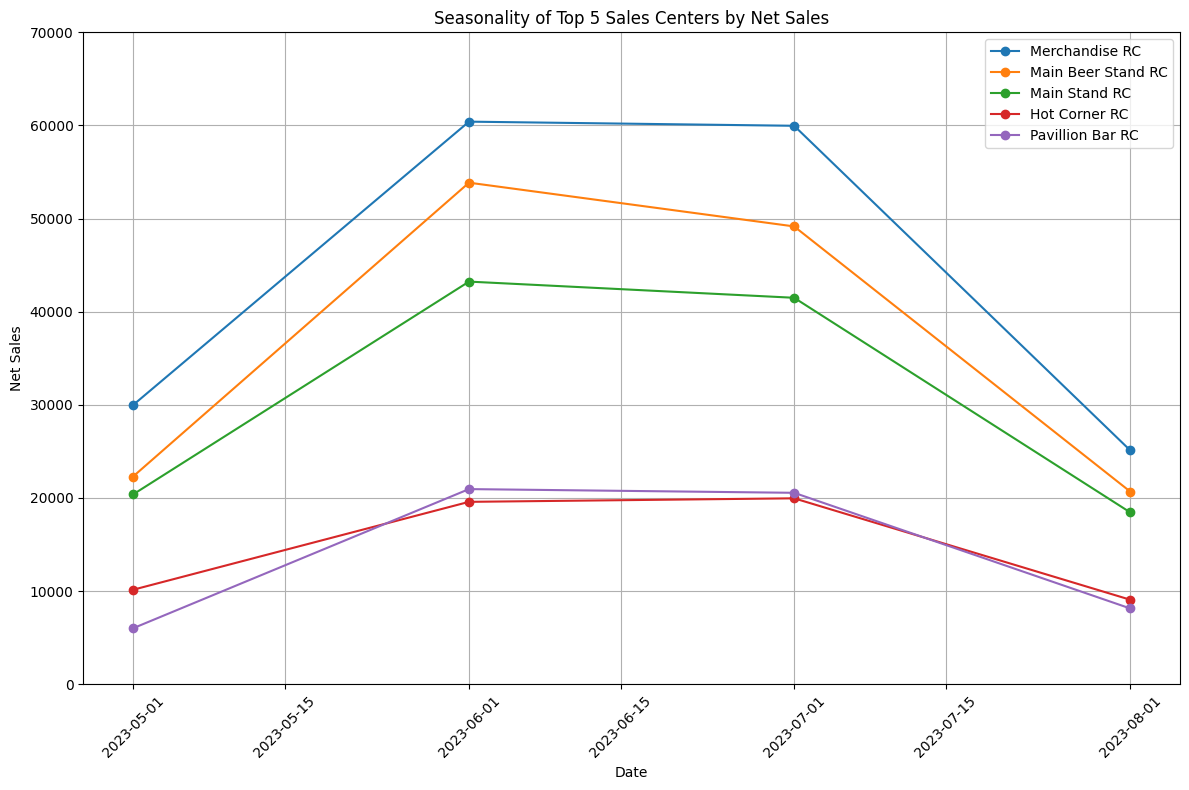

In [ ]:
plt.figure(figsize=(12, 8))

# Loops through each item and plot its data
for item in top_5_items:
    # Filters the data for the current item
    sale_data = sales_filtered[sales_filtered['Sales Category'] == item].copy()
    sale_data['date'] = pd.to_datetime(sale_data['date'])
    sale_data['Month'] = sale_data['date'].dt.month
    sale_data['Year'] = sale_data['date'].dt.year

    # Groups data by month and summs the net sales
    monthly_sales = sale_data.groupby(['Year', 'Month'])['Net Sales'].sum()

    # Converts the index to a datetime object
    monthly_sales.index = pd.to_datetime(monthly_sales.index.map(lambda x: f'{x[0]}-{x[1]}'))

    # Sorts the index
    monthly_sales = monthly_sales.sort_index()

    # Plots
    plt.plot(monthly_sales.index, monthly_sales.values, marker='o', label=f'{item}')

plt.title('Seasonality of Top 5 Sales Centers by Net Sales')
plt.xlabel('Date')
plt.ylabel('Net Sales')
plt.ylim(0, 70000)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()